# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [10]:
# Import warnings
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'E:\MSc\Explotory Data Analysis\Starter Notebook - EDA NYC Taxi\DataSet')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print('Sampling File - {0}', file_name)

        # Reading the current file
        # Assuming the files are in parquet format, you can change this if they are in a different format
        data = pd.read_parquet(file_path) 

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in data['tpep_pickup_datetime'].dt.date.unique():

            # Iterate through each hour of the selected date
            # hour_data is the DF of entries for an hour 'X' on a date 'Y'
            for hour in range(24):
                # Filter the data for the current date and hour
                hour_data = data[(data['tpep_pickup_datetime'].dt.date == date) & 
                                 (data['tpep_pickup_datetime'].dt.hour == hour)]
                
                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    sampled_hour_data = hour_data.sample(frac=0.05, random_state=42)
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sampled_hour_data], ignore_index=True)

                

                

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Sampling File - {0} 2023-1.parquet
Sampling File - {0} 2023-10.parquet
Sampling File - {0} 2023-11.parquet
Sampling File - {0} 2023-12.parquet
Sampling File - {0} 2023-2.parquet
Sampling File - {0} 2023-3.parquet
Sampling File - {0} 2023-4.parquet
Sampling File - {0} 2023-5.parquet
Sampling File - {0} 2023-6.parquet
Sampling File - {0} 2023-7.parquet
Sampling File - {0} 2023-8.parquet
Sampling File - {0} 2023-9.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [4]:
# Store the df in csv/parquet
df.to_parquet(r'E:\MSc\Explotory Data Analysis\Starter Notebook - EDA NYC Taxi\sampled_nyc_taxi_data.parquet', index=False)
# df.to_parquet('')

NameError: name 'df' is not defined

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [12]:
def check_df(df_input, head:5, tail:5, detail:True):
    print("############# DataFrame Summary: #############")
    print("\n")

    print("############# Index of DataFrame: #############")
    print(df_input.index)       
    print("\n")
    
    print("############# Shape of DataFrame: #############")
    print(df_input.shape)
    print("\n")
    
    print("############# Columns in DataFrame: #############") 
    print(df_input.columns)
    print("\n")
    
    print("############# Data Types of Columns: #############")
    print(df_input.dtypes)
    print("\n")
    
    print("############# First " + str(head) + " Rows of DataFrame: #############")   
    print(df_input.head(head))
    print("\n")

    print("############# Last " + str(tail) + " Rows of DataFrame: #############")   
    print(df_input.tail(tail))
    print("\n")
    
    print("############# Info #############")
    print(df_input.info())
    print("\n")

    
    if detail:
        print("############# Descriptive Statistics: #############")
        print(df_input.describe(include='all').T)  # include='all' to get stats for all columns, including non-numeric
        print("\n")
    

    print("############# Duplicated: #############")
    print(df_input.duplicated().any())
    print("\n")
    
    print("############# Missing Values: #############")
    print(df_input.isnull().sum())
    print("\n")
    
    print("############# Total Missing Values: #############")
    print(df_input.isnull().sum().sum())
    print("\n")
    

In [13]:
# Load the new data file

df_sampled = pd.read_parquet(r'E:\MSc\Explotory Data Analysis\Starter Notebook - EDA NYC Taxi\sampled_nyc_taxi_data.parquet')
check_df(df_sampled, 5, 5, True)

############# DataFrame Summary: #############


############# Index of DataFrame: #############
RangeIndex(start=0, stop=1896400, step=1)


############# Shape of DataFrame: #############
(1896400, 20)


############# Columns in DataFrame: #############
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')


############# Data Types of Columns: #############
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID 

In [14]:
# df.head()
df_sampled.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


In [15]:
# df.info()
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed
df_sampled.reset_index(drop=True, inplace=True)
# Verify the index is fixed
print("First few rows with new index:") 
print(df_sampled.head())




First few rows with new index:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_ta

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Combine the two airport fee columns
# Fix the NaN values in the airport fee columns
df_sampled['airport_fee'].fillna(0, inplace=True)  
df_sampled['Airport_fee'].fillna(0, inplace=True)
df_sampled['total_airport_fee'] = df_sampled['airport_fee'] + df_sampled['Airport_fee']
# Drop the individual airport fee columns
df_sampled.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)
# Verify the changes
print("DataFrame after combining airport fee columns:") 
check_df(df_sampled, 5, 5, True)



DataFrame after combining airport fee columns:
############# DataFrame Summary: #############


############# Index of DataFrame: #############
RangeIndex(start=0, stop=1896400, step=1)


############# Shape of DataFrame: #############
(1896400, 19)


############# Columns in DataFrame: #############
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'total_airport_fee'],
      dtype='object')


############# Data Types of Columns: #############
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_f

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [18]:
# check where values of fare amount are negative

negative_fare_indices = []  # List to store indices of negative fare amounts

for index, row in df_sampled.iterrows():
    
    if row['fare_amount'] < 0:
        negative_fare_indices.append(index)


In [19]:
print(f"Number of negative fare amounts: {len(negative_fare_indices)}")
# Print the indices of negative fare amounts   
print("Indices of negative fare amounts:", negative_fare_indices)  

Number of negative fare amounts: 0
Indices of negative fare amounts: []


In [20]:
# check where values of total amount are negative

negative_fare_indices = []  # List to store indices of negative fare amounts

for index, row in df_sampled.iterrows():
    
    if row['total_amount'] < 0:
        negative_fare_indices.append(index)




Did you notice something different in the `RatecodeID` column for above records?

In [21]:
# Analyse RatecodeID for the negative fare amounts
print(negative_fare_indices)
#print ratecode ID for the negative fare amounts
for index in negative_fare_indices:
    print(f"RatecodeID for negative fare at index {index}: {df_sampled.loc[index, 'RatecodeID']}") 

[3966, 9093, 77200, 77920, 86509, 117837, 120029, 172820, 182975, 184944, 194896, 239893, 240472, 241978, 267977, 279360, 341633, 354781, 358634, 360309, 361257, 377312, 390002, 394759, 430572, 444033, 456757, 488863, 517075, 541046, 557871, 592821, 604717, 648645, 678084, 692757, 711296, 725836, 736319, 896231, 938415, 940700, 952127, 961390, 984075, 989979, 998118, 998197, 1018792, 1061724, 1103578, 1124730, 1126623, 1136263, 1198459, 1204192, 1245038, 1293365, 1299057, 1315110, 1377689, 1444462, 1456503, 1503406, 1523752, 1532470, 1544156, 1545726, 1590233, 1608308, 1620491, 1653357, 1658058, 1734702, 1742776, 1762681, 1774112, 1893750]
RatecodeID for negative fare at index 3966: 3.0
RatecodeID for negative fare at index 9093: 2.0
RatecodeID for negative fare at index 77200: 2.0
RatecodeID for negative fare at index 77920: 1.0
RatecodeID for negative fare at index 86509: 1.0
RatecodeID for negative fare at index 117837: 2.0
RatecodeID for negative fare at index 120029: 1.0
RatecodeI

In [22]:
# Find which columns have negative values

# Create a dictionary to store columns with negative values
negative_values = {}

# Check numeric columns for negative values
numeric_columns = df_sampled.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    neg_count = (df_sampled[column] < 0).sum()
    if neg_count > 0:
        negative_values[column] = neg_count

# Display results
print("Columns containing negative values:")
for column, count in negative_values.items():
    print(f"{column}: {count} negative values")

# Display some example rows with negative values for verification
for column in negative_values.keys():
    print(f"\nSample rows where {column} is negative:")
    print(df_sampled[df_sampled[column] < 0][column].head())


Columns containing negative values:
extra: 3 negative values
mta_tax: 73 negative values
improvement_surcharge: 78 negative values
total_amount: 78 negative values
congestion_surcharge: 56 negative values
total_airport_fee: 15 negative values

Sample rows where extra is negative:
184944   -1.0
300725   -2.5
361257   -1.0
Name: extra, dtype: float64

Sample rows where mta_tax is negative:
9093     -0.5
77200    -0.5
77920    -0.5
86509    -0.5
117837   -0.5
Name: mta_tax, dtype: float64

Sample rows where improvement_surcharge is negative:
3966    -1.0
9093    -1.0
77200   -1.0
77920   -1.0
86509   -1.0
Name: improvement_surcharge, dtype: float64

Sample rows where total_amount is negative:
3966    -1.00
9093    -5.25
77200   -4.00
77920   -4.00
86509   -4.00
Name: total_amount, dtype: float64

Sample rows where congestion_surcharge is negative:
9093     -2.5
77200    -2.5
77920    -2.5
86509    -2.5
117837   -2.5
Name: congestion_surcharge, dtype: float64

Sample rows where total_airpo

In [23]:
# fix these negative values

# 1. Fix fare_amount negatives - replace with absolute value if small negative, 
# remove if large negative as these are likely errors
df_sampled['fare_amount'] = np.where(
    df_sampled['fare_amount'] >= -10,
    abs(df_sampled['fare_amount']),
    df_sampled['fare_amount']
)
df_sampled = df_sampled[df_sampled['fare_amount'] >= 0]

# 2. Fix negative extra charges - set to 0 since these shouldn't be negative
charge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 
                 'tolls_amount', 'total_amount', 'congestion_surcharge', 'total_airport_fee']
for col in charge_columns:
    df_sampled[col] = df_sampled[col].clip(lower=0)

# 3. Fix negative trip distances - remove these rows as negative distance is invalid
df_sampled = df_sampled[df_sampled['trip_distance'] >= 0]

# Verify fixes
print("Number of negative values remaining:")
for col in df_sampled.select_dtypes(include=['int64', 'float64']).columns:
    neg_count = (df_sampled[col] < 0).sum()
    if neg_count > 0:
        print(f"{col}: {neg_count}")


Number of negative values remaining:


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




Proportion of missing values in each column (%):
congestion_surcharge     3.420903
passenger_count          3.420903
RatecodeID               3.420903
store_and_fwd_flag       3.420903
VendorID                 0.000000
extra                    0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
payment_type             0.000000
fare_amount              0.000000
tpep_pickup_datetime     0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
total_airport_fee        0.000000
dtype: float64


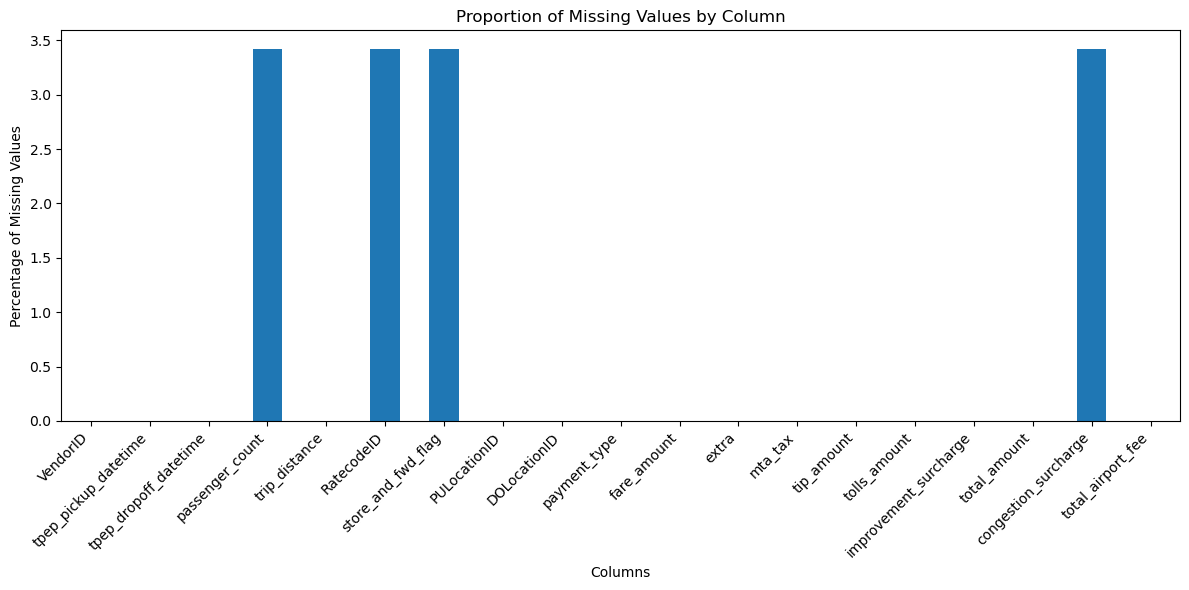

In [24]:
# Find the proportion of missing values in each column
# Calculate the proportion of missing values in each column
missing_proportions = (df_sampled.isnull().sum() / len(df_sampled)) * 100

# Display results sorted by proportion of missing values, highest to lowest
print("Proportion of missing values in each column (%):")
print(missing_proportions.sort_values(ascending=False))

# Create a visualization of missing value proportions
plt.figure(figsize=(12, 6))
missing_proportions.plot(kind='bar')
plt.title('Proportion of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [25]:
# Display the rows with null values
# Display the rows with null values
null_rows = df_sampled[df_sampled.isnull().any(axis=1)]
print("\nRows containing null values:")
print(null_rows)

# Get a count of null values by column for these rows
print("\nNull value counts in affected rows:")
print(null_rows.isnull().sum())

# Display summary statistics for the rows with nulls
print("\nSummary of rows with null values:")
print(null_rows.describe(include='all'))
# Impute NaN values in 'passenger_count'
df_sampled['passenger_count'].fillna(0, inplace=True)



Rows containing null values:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35              NaN   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22              NaN   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03              NaN   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01              NaN   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46              NaN  

Did you find zeroes in passenger_count? Handle these.

In [26]:

#FInd all rows where passenger_count is 0
zero_passenger_count = df_sampled[df_sampled['passenger_count'] == 0]
print("\nRows with passenger_count = 0:")   
print(zero_passenger_count.shape)

#Delete these rows
df_sampled = df_sampled[df_sampled['passenger_count'] > 0]

zero_passenger_count = df_sampled[df_sampled['passenger_count'] == 0]
print("\nRows with passenger_count = 0:")   
print(zero_passenger_count.shape)
# Check if any rows with passenger_count = 0 remain
if zero_passenger_count.empty:
    print("No rows with passenger_count = 0 remain after deletion.")


Rows with passenger_count = 0:
(94555, 19)

Rows with passenger_count = 0:
(0, 19)
No rows with passenger_count = 0 remain after deletion.


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [27]:
# Fix missing values in 'RatecodeID'
df_sampled['RatecodeID'].fillna(1, inplace=True)  # Assuming 1 is a valid default value for RatecodeID
#FInd all rows where RatecodeID is NaN
missing_ratecode = df_sampled[df_sampled['RatecodeID'].isnull()]    
# Display the rows with missing RatecodeID
print("\nRows with missing RatecodeID:")    
print(missing_ratecode)

check_df(df_sampled, 5, 5, True)




Rows with missing RatecodeID:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, total_airport_fee]
Index: []
############# DataFrame Summary: #############


############# Index of DataFrame: #############
Index([      0,       1,       2,       3,       5,       6,       7,       8,
             9,      10,
       ...
       1896390, 1896391, 1896392, 1896393, 1896394, 1896395, 1896396, 1896397,
       1896398, 1896399],
      dtype='int64', length=1801845)


############# Shape of DataFrame: #############
(1801845, 19)


############# Columns in DataFrame: #############
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID',

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [28]:
# handle null values in congestion_surcharge
df_sampled['congestion_surcharge'].fillna(0, inplace=True)  # Assuming 0 is a valid default value for congestion_surcharge
#find all rows where congestion_surcharge is NaN
missing_congestion = df_sampled[df_sampled['congestion_surcharge'].isnull()]    
# Display the rows with missing congestion_surcharge
print("\nRows with missing congestion_surcharge:")  
print(missing_congestion)





Rows with missing congestion_surcharge:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, total_airport_fee]
Index: []


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

Proportion of missing values in each column (%):
VendorID                 0.0
fare_amount              0.0
congestion_surcharge     0.0
total_amount             0.0
improvement_surcharge    0.0
tolls_amount             0.0
tip_amount               0.0
mta_tax                  0.0
extra                    0.0
payment_type             0.0
tpep_pickup_datetime     0.0
DOLocationID             0.0
PULocationID             0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
trip_distance            0.0
passenger_count          0.0
tpep_dropoff_datetime    0.0
total_airport_fee        0.0
dtype: float64


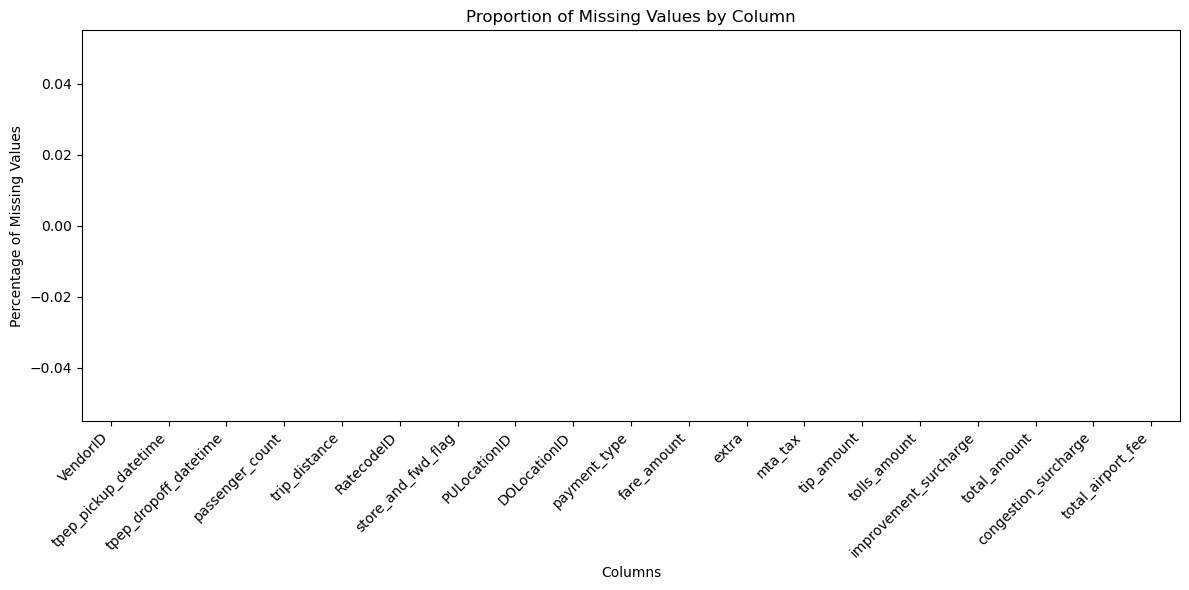

In [29]:
# Handle any remaining missing values
# Find the proportion of missing values in each column
# Calculate the proportion of missing values in each column
missing_proportions = (df_sampled.isnull().sum() / len(df_sampled)) * 100

# Display results sorted by proportion of missing values, highest to lowest
print("Proportion of missing values in each column (%):")
print(missing_proportions.sort_values(ascending=False))

# Create a visualization of missing value proportions
plt.figure(figsize=(12, 6))
missing_proportions.plot(kind='bar')
plt.title('Proportion of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [23]:
# Describe the data and check if there are any potential outliers present
print("Descriptive statistics of the DataFrame:")
print(df_sampled.describe(include='all').T)  # include='all' to get stats for all columns, including non-numeric
# Check for potential out of place values in various columns
# Check for potential out of place values in various columns
numeric_columns = df_sampled.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    # Calculate the 1st and 99th percentiles
    lower_bound = df_sampled[column].quantile(0.01)
    upper_bound = df_sampled[column].quantile(0.99)
    
    # Identify outliers
    outliers = df_sampled[(df_sampled[column] < lower_bound) | (df_sampled[column] > upper_bound)]
    
    if not outliers.empty:
        print(f"\nPotential outliers in column '{column}':")
        print(outliers[[column]])  # Display first few outliers for this column
    



Descriptive statistics of the DataFrame:
                           count unique  top     freq  \
VendorID               1801845.0    NaN  NaN      NaN   
tpep_pickup_datetime     1801845    NaN  NaN      NaN   
tpep_dropoff_datetime    1801845    NaN  NaN      NaN   
passenger_count        1801845.0    NaN  NaN      NaN   
trip_distance          1801845.0    NaN  NaN      NaN   
RatecodeID             1801845.0    NaN  NaN      NaN   
store_and_fwd_flag       1801845      2    N  1791511   
PULocationID           1801845.0    NaN  NaN      NaN   
DOLocationID           1801845.0    NaN  NaN      NaN   
payment_type           1801845.0    NaN  NaN      NaN   
fare_amount            1801845.0    NaN  NaN      NaN   
extra                  1801845.0    NaN  NaN      NaN   
mta_tax                1801845.0    NaN  NaN      NaN   
tip_amount             1801845.0    NaN  NaN      NaN   
tolls_amount           1801845.0    NaN  NaN      NaN   
improvement_surcharge  1801845.0    NaN  NaN   

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [30]:
# remove passenger_count > 6
df_sampled = df_sampled[df_sampled['passenger_count'] <= 6]


In [31]:
# Continue with outlier handling
#Remove trip_distance which is nearly 0 or more than 250

df_sampled = df_sampled[(df_sampled['trip_distance'] >= 0.1) & (df_sampled['trip_distance'] <= 250)]  # Assuming trip_distance < 0.1 is an outlier
# Remove fare_amount more than 300
df_sampled = df_sampled[df_sampled['fare_amount'] <= 300]

df_sampled = df_sampled[df_sampled['payment_type'] != 0]  # Assuming payment_type 0 is invalid






In [32]:
df_sampled = df_sampled[df_sampled['RatecodeID'] < 7]  # Assuming RatecodeID 99 is invalid

In [33]:
# Do any columns need standardising?

#reset the index after all modifications
df_sampled.reset_index(drop=True, inplace=True)
check_df(df_sampled, 5, 5, True)




############# DataFrame Summary: #############


############# Index of DataFrame: #############
RangeIndex(start=0, stop=1765669, step=1)


############# Shape of DataFrame: #############
(1765669, 19)


############# Columns in DataFrame: #############
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'total_airport_fee'],
      dtype='object')


############# Data Types of Columns: #############
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID          

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [34]:
df_sampled.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'total_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

In [35]:
def categorize_columns(input_df, cat_th = 10, car_th = 20):
    cat_cols = [col for col in input_df.columns if input_df[col].dtype == 'object']

    num_but_cat = [col for col in input_df.columns if input_df[col].nunique() < cat_th and input_df[col].dtype != 'object']

    cat_but_car = [col for col in input_df.columns if input_df[col].nunique() < car_th and input_df[col].dtype == 'object']

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    #num cols

    num_cols = [col for col in input_df.columns if input_df[col].dtype in ['int64', 'float64']]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    date_cols = [col for col in input_df.columns if input_df[col].dtype == 'datetime64[us]']

    print(f"Observation:{input_df.shape[0]}")
    print(f"Variables:{input_df.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")    
    print(f"Date Columns: {len(date_cols)}")
    print(f"Categorical But Cardinal: {len(cat_but_car)}")
    print(f"Numerical But Categorical: {len(num_but_cat)}")

    return cat_cols, num_cols, date_cols, cat_but_car, num_but_cat
  

In [36]:
cat_cols, num_cols, date_cols, cat_but_car, num_but_cat = categorize_columns(df_sampled, cat_th=10, car_th=20)

Observation:1765669
Variables:19
Categorical Columns: 8
Numerical Columns: 8
Date Columns: 2
Categorical But Cardinal: 1
Numerical But Categorical: 8


In [37]:
print(f"Categorical Columns List:{cat_cols}")
print(f"Numerical Columns List:{num_cols}")
print(f"Date Columns List:{date_cols}")
print(f"Categorical But Cardinal List:{cat_but_car}")
print(f"Numerical But Categorical List:{num_but_cat}")

Categorical Columns List:['VendorID', 'passenger_count', 'RatecodeID', 'payment_type', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'total_airport_fee']
Numerical Columns List:['trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount']
Date Columns List:['tpep_pickup_datetime', 'tpep_dropoff_datetime']
Categorical But Cardinal List:['store_and_fwd_flag']
Numerical But Categorical List:['VendorID', 'passenger_count', 'RatecodeID', 'payment_type', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'total_airport_fee']


**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.


Hourly trends in taxi pickups:
    pickup_hour  pickup_count
0             0         49687
1             1         33212
2             2         21735
3             3         14108
4             4          8764
5             5          9194
6             6         22976
7             7         46722
8             8         65278
9             9         74807
10           10         81858
11           11         88962
12           12         96744
13           13         99845
14           14        107308
15           15        109963
16           16        109966
17           17        119452
18           18        125352
19           19        112676
20           20        100679
21           21        100576
22           22         92935
23           23         72870


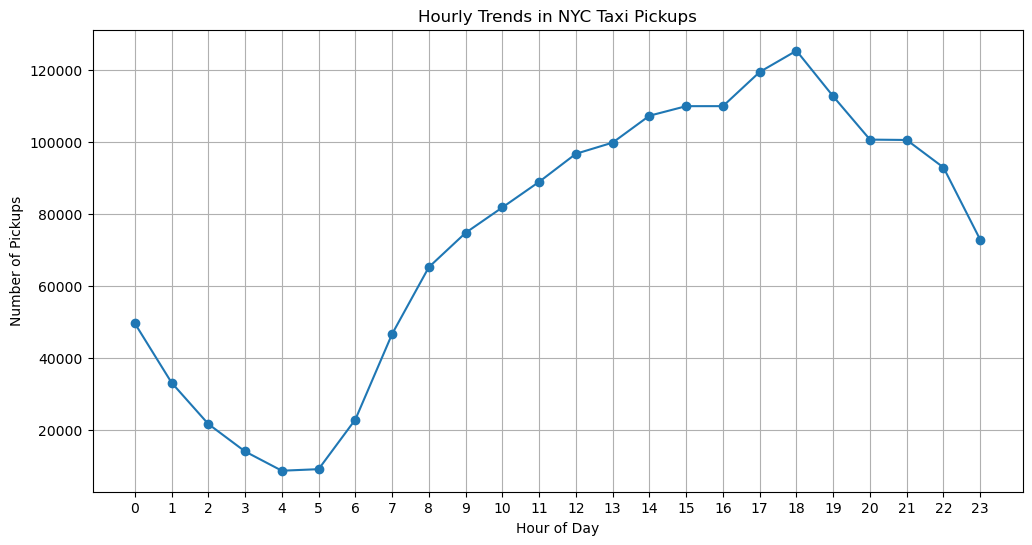

In [38]:
# Find and show the hourly trends in taxi pickups
# Convert 'tpep_pickup_datetime' to datetime if not already
df_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_sampled['tpep_pickup_datetime'], errors='coerce')    
# Extract hour from 'tpep_pickup_datetime'
df_sampled['pickup_hour'] = df_sampled['tpep_pickup_datetime'].dt.hour  
# Group by hour and count pickups
hourly_trends = df_sampled.groupby('pickup_hour').size().reset_index(name='pickup_count')
# Display the hourly trends
print("\nHourly trends in taxi pickups:")
print(hourly_trends)
# Plot the hourly trends
plt.figure(figsize=(12, 6))
plt.plot(hourly_trends['pickup_hour'], hourly_trends['pickup_count'], marker='o')
plt.title('Hourly Trends in NYC Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid()
plt.show()




Daily trends in taxi pickups:
  pickup_day  pickup_count
0     Friday        261472
1     Monday        219978
2   Saturday        257222
3     Sunday        222190
4   Thursday        277130
5    Tuesday        256267
6  Wednesday        271410


<Figure size 1200x600 with 0 Axes>

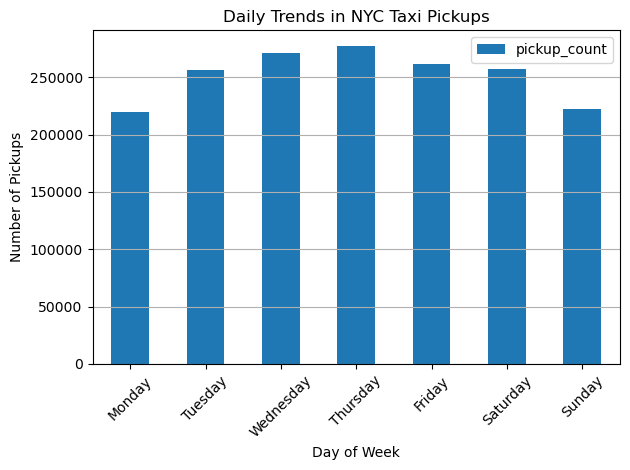

In [39]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract day of the week from 'tpep_pickup_datetime'
df_sampled['pickup_day'] = df_sampled['tpep_pickup_datetime'].dt.day_name()
# Group by day of the week and count pickups
daily_trends = df_sampled.groupby('pickup_day').size().reset_index(name='pickup_count')
# Display the daily trends  
print("\nDaily trends in taxi pickups:")
print(daily_trends)
# Plot the daily trends
plt.figure(figsize=(12, 6))
daily_trends.sort_values('pickup_day', key=lambda x: pd.Categorical(x, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)).plot(x='pickup_day', y='pickup_count', kind='bar')
plt.title('Daily Trends in NYC Taxi Pickups')   
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




Monthly trends in taxi pickups:
   pickup_month  pickup_count
0         April        152801
1        August        129990
2      December        152198
3      February        135818
4       January        143235
5          July        134598
6          June        153342
7         March        158130
8           May        162675
9      November        153131
10      October        160791
11    September        128960


<Figure size 1200x600 with 0 Axes>

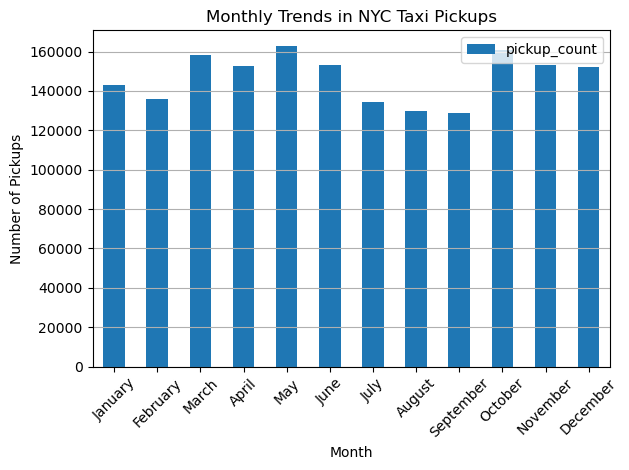

In [40]:
# Show the monthly trends in pickups
# Extract month from 'tpep_pickup_datetime'
df_sampled['pickup_month'] = df_sampled['tpep_pickup_datetime'].dt.month_name()
# Group by month and count pickups
monthly_trends = df_sampled.groupby('pickup_month').size().reset_index(name='pickup_count')
# Display the monthly trends    
print("\nMonthly trends in taxi pickups:")
print(monthly_trends)
# Plot the monthly trends
plt.figure(figsize=(12, 6))
monthly_trends.sort_values('pickup_month', key=lambda x: pd.Categorical(x, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)).plot(x='pickup_month', y='pickup_count', kind='bar')
plt.title('Monthly Trends in NYC Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

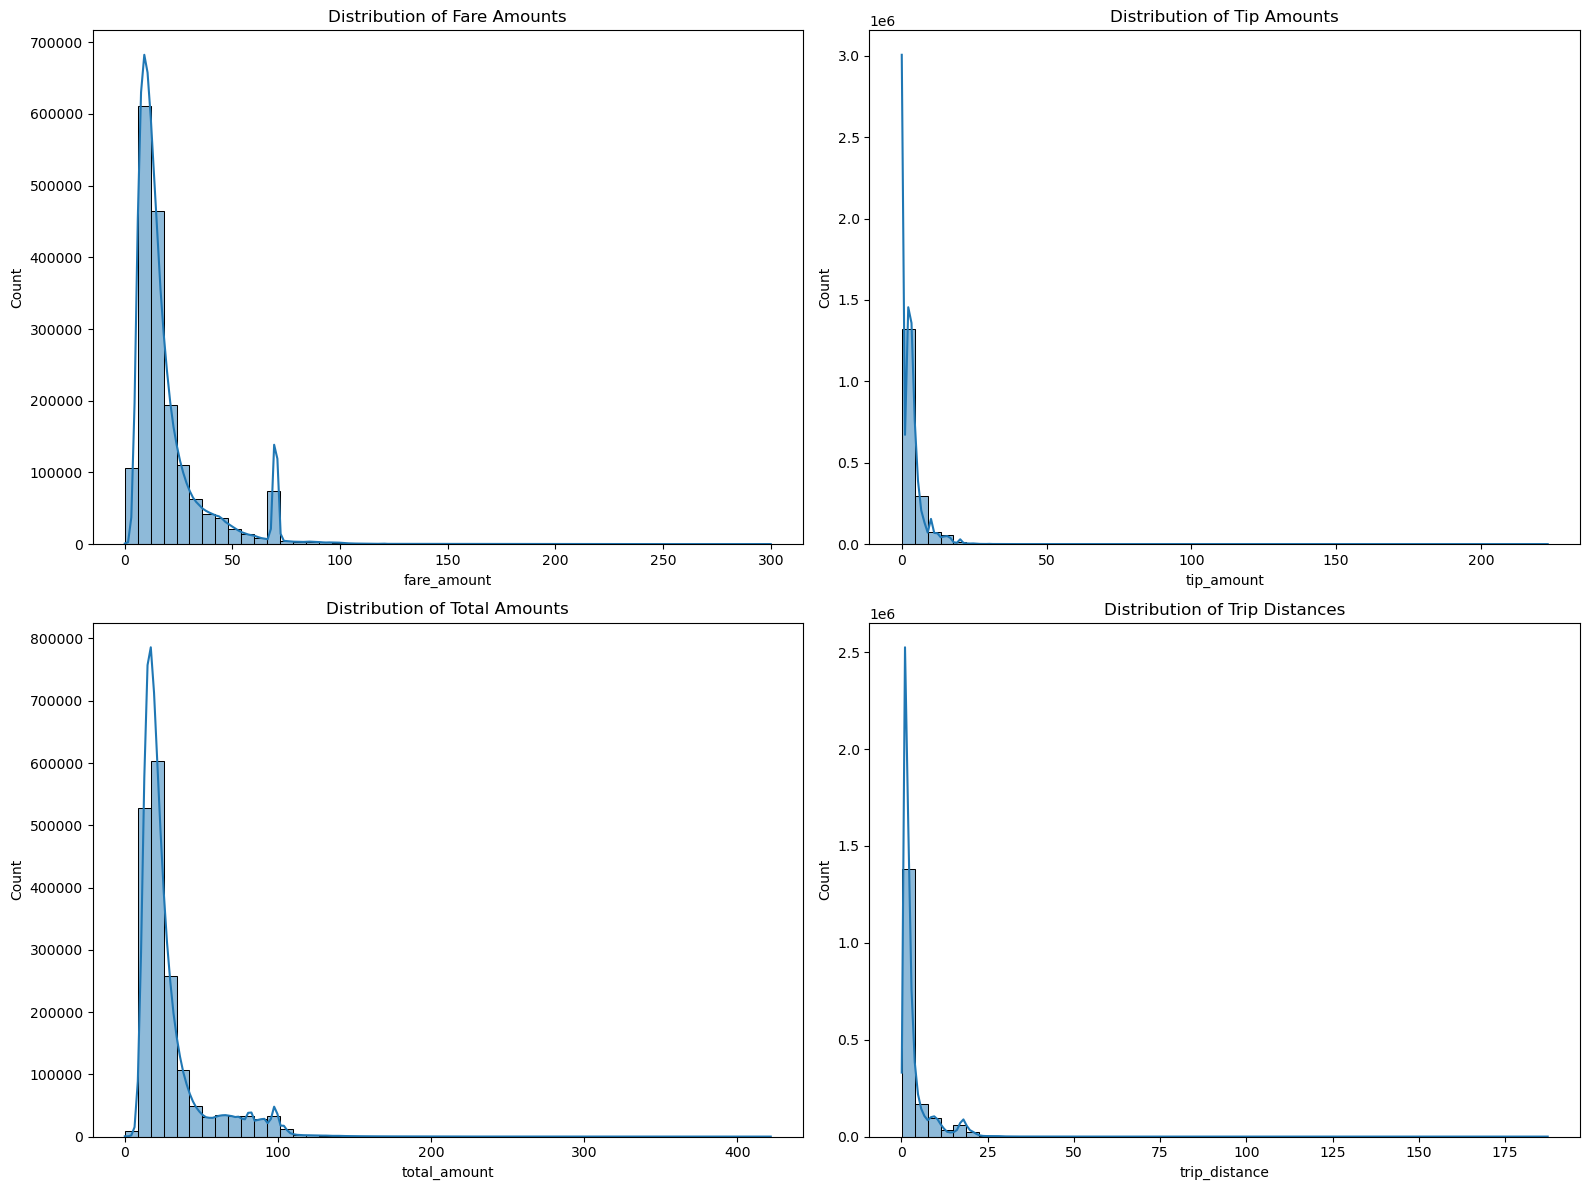

In [41]:
# Analyse the above parameters
# Check the distribution of fare amounts, tip amounts, and total amounts and trip distances
# Plot distributions of fare_amount, tip_amount, total_amount, and trip_distance
plt.figure(figsize=(16, 12))    
# Plot fare_amount distribution
plt.subplot(2, 2, 1)    
sns.histplot(df_sampled['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amounts')
# Plot tip_amount distribution
plt.subplot(2, 2, 2)
sns.histplot(df_sampled['tip_amount'], bins=50, kde=True)
plt.title('Distribution of Tip Amounts')
# Plot total_amount distribution    
plt.subplot(2, 2, 3)
sns.histplot(df_sampled['total_amount'], bins=50, kde=True)
plt.title('Distribution of Total Amounts')
# Plot trip_distance distribution
plt.subplot(2, 2, 4)
sns.histplot(df_sampled['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distances')
plt.tight_layout()
plt.show()



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [42]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df_sampled[(df_sampled['fare_amount'] > 0) & 
                         (df_sampled['tip_amount'] > 0) & 
                         (df_sampled['total_amount'] > 0) & 
                         (df_sampled['trip_distance'] > 0)]

check_df(df_non_zero, 5, 5, True)



############# DataFrame Summary: #############


############# Index of DataFrame: #############
Index([      1,       4,       5,       6,       7,       8,      10,      11,
            12,      13,
       ...
       1765655, 1765656, 1765660, 1765661, 1765662, 1765663, 1765664, 1765665,
       1765666, 1765668],
      dtype='int64', length=1390113)


############# Shape of DataFrame: #############
(1390113, 22)


############# Columns in DataFrame: #############
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'total_airport_fee',
       'pickup_hour', 'pickup_day', 'pickup_month'],
      dtype='object')


############# Data Types of Columns: #############
VendorID                          i

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend


Monthly revenue data:
   tpep_pickup_datetime  fare_amount  tip_amount  total_amount  trip_distance
0               2022-12         6.50        2.00         13.50           0.86
1               2023-01   2057113.80   488609.32    3163982.28      378698.03
2               2023-02   1954747.13   465712.99    3012368.12      352872.73
3               2023-03   2360066.28   561018.80    3622992.07      425384.07
4               2023-04   2297077.84   544484.32    3511475.77      414805.33
5               2023-05   2531739.36   596549.96    3858445.25      448455.05
6               2023-06   2373935.71   559331.50    3620046.92      424771.91
7               2023-07   2014214.82   473352.76    3069412.86      366892.26
8               2023-08   1939157.19   458335.60    2968414.99      355644.77
9               2023-09   2065430.27   484055.63    3134832.96      354700.78
10              2023-10   2568358.74   606831.76    3911562.20      443392.74
11              2023-11   2406488.79   57

<Figure size 1200x600 with 0 Axes>

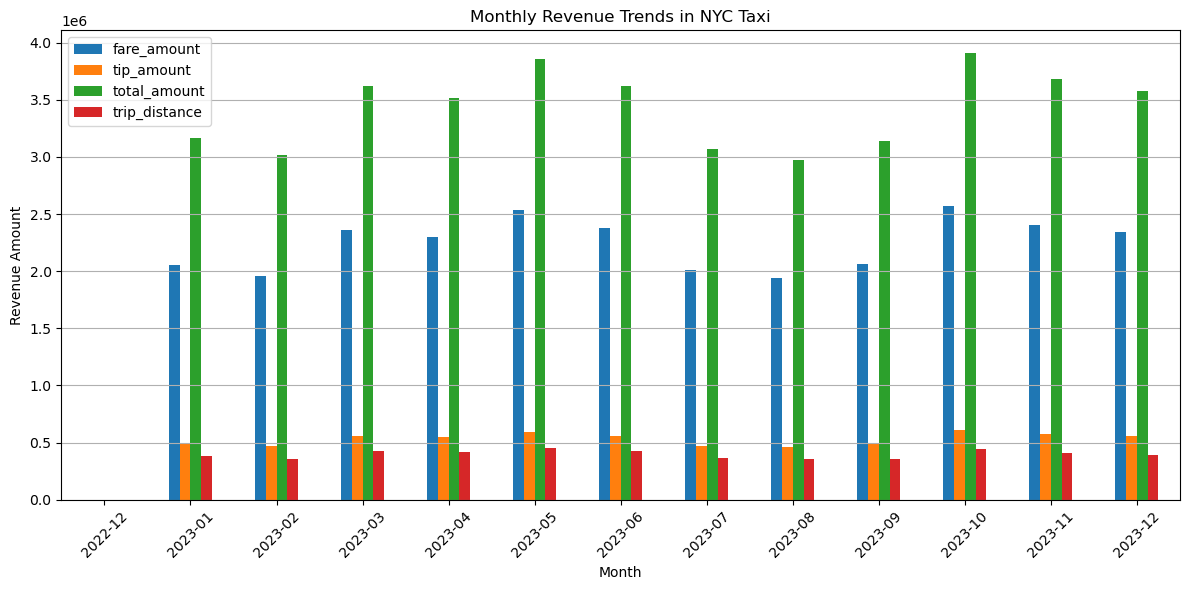

In [43]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.to_period('M')).agg({
    'fare_amount': 'sum',
    'tip_amount': 'sum',
    'total_amount': 'sum',
    'trip_distance': 'sum'
}).reset_index()

# Display the monthly revenue data
print("\nMonthly revenue data:")    
print(monthly_revenue)
# Plot monthly revenue trends
plt.figure(figsize=(12, 6))
monthly_revenue.set_index('tpep_pickup_datetime').plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Revenue Trends in NYC Taxi')
plt.xlabel('Month')
plt.ylabel('Revenue Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue


Quarterly revenue data:
  tpep_pickup_datetime  fare_amount  tip_amount  total_amount  trip_distance
0               2022Q4         6.50        2.00         13.50           0.86
1               2023Q1   6371927.21  1515341.11    9799342.47     1156954.83
2               2023Q2   7202752.91  1700365.78   10989967.94     1288032.29
3               2023Q3   6018802.28  1415743.99    9172660.81     1077237.81
4               2023Q4   7314222.33  1741267.73   11165775.22     1245225.79


<Figure size 1200x600 with 0 Axes>

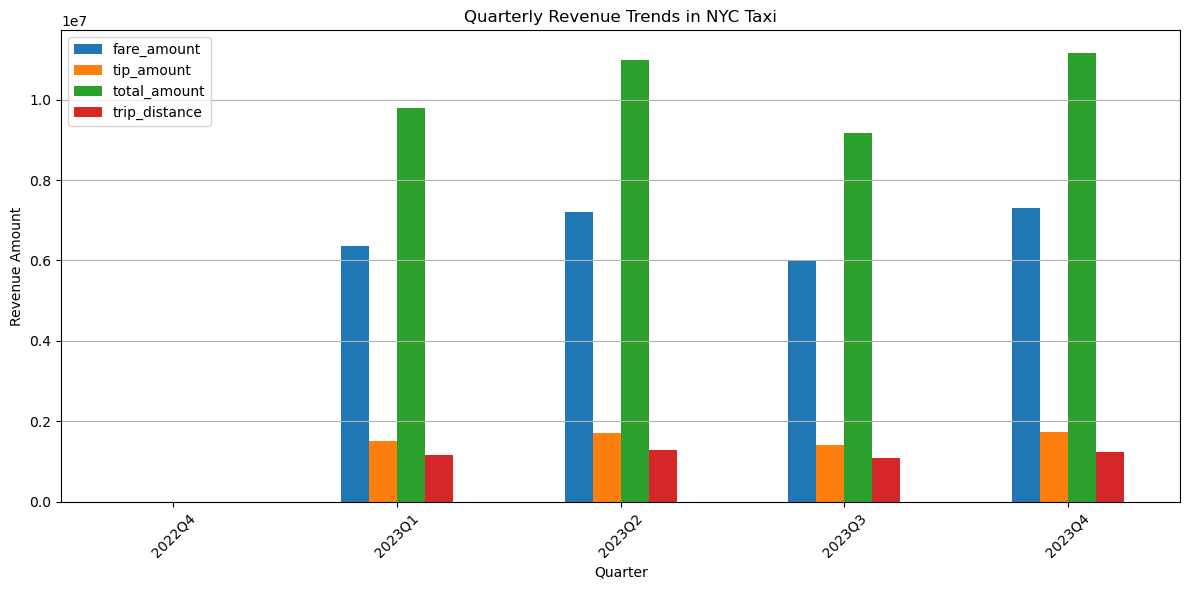

In [44]:
# Calculate proportion of each quarter
quarterly_revenue = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.to_period('Q')).agg({
    'fare_amount': 'sum',
    'tip_amount': 'sum',
    'total_amount': 'sum',
    'trip_distance': 'sum'
}).reset_index()
# Display the quarterly revenue data
print("\nQuarterly revenue data:")

print(quarterly_revenue)
# Plot quarterly revenue trends
plt.figure(figsize=(12, 6))
quarterly_revenue.set_index('tpep_pickup_datetime').plot(kind='bar', figsize=(12, 6))
plt.title('Quarterly Revenue Trends in NYC Taxi')
plt.xlabel('Quarter')
plt.ylabel('Revenue Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0


Correlation matrix:
               fare_amount  trip_distance
fare_amount       1.000000       0.954776
trip_distance     0.954776       1.000000


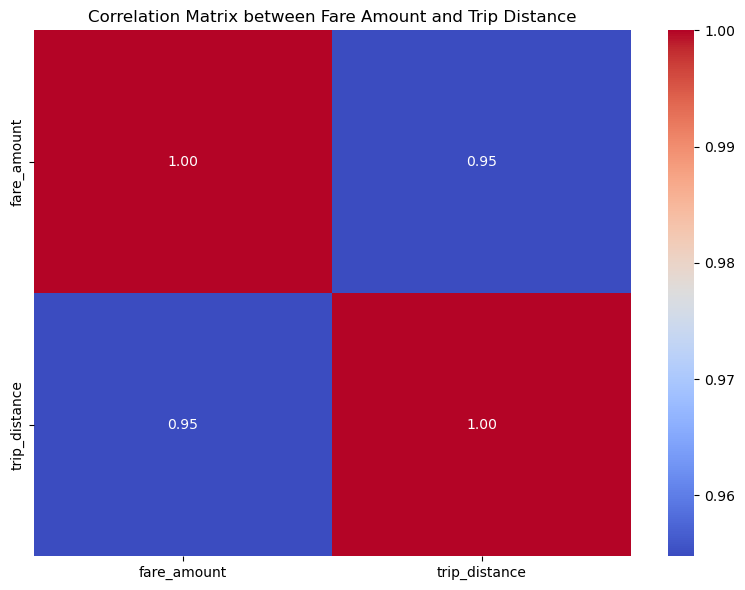

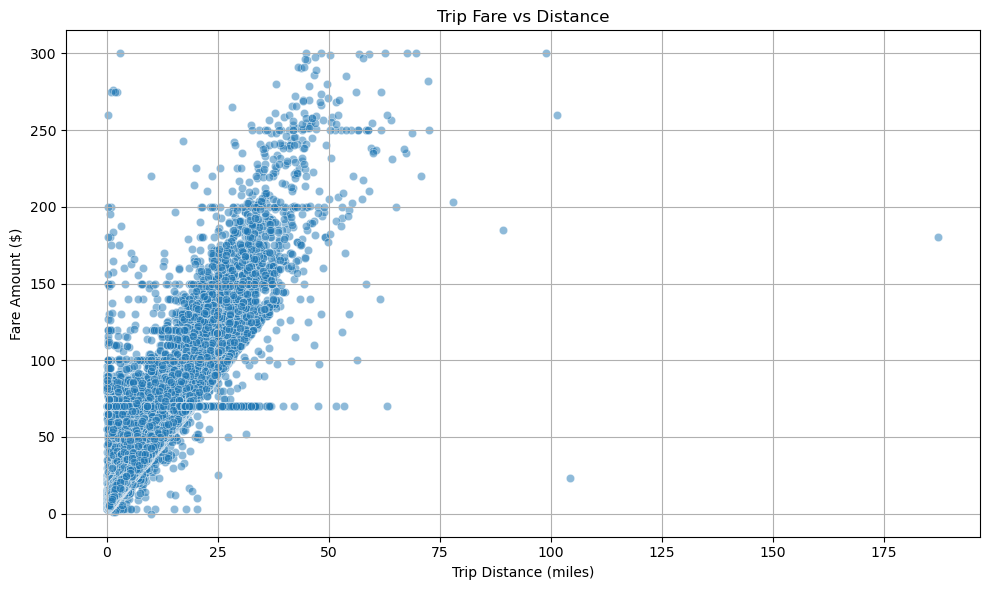

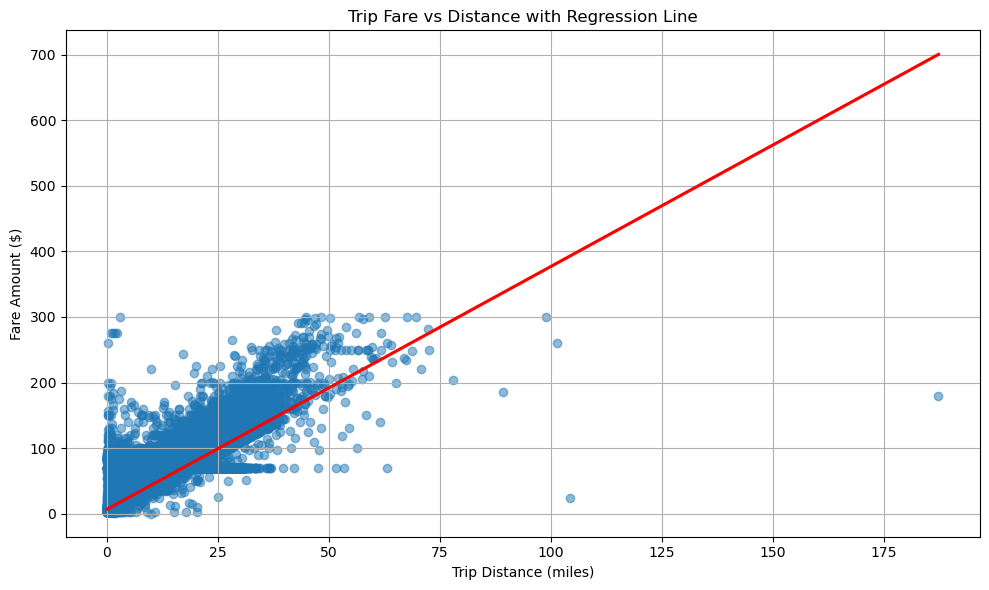

In [47]:
# Show how trip fare is affected by distance
# Plot fare_amount vs trip_distance

#Find correlations between fare_amount, trip_distance, and other relevant columns
correlation_matrix = df_non_zero[['fare_amount', 'trip_distance']].corr()
print("\nCorrelation matrix:")  
print(correlation_matrix)

#plot correlation matrix
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Fare Amount and Trip Distance')
plt.tight_layout()
plt.show()




plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_non_zero, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Trip Fare vs Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.tight_layout()
plt.show()
# Show how trip fare is affected by distance
# Plot fare_amount vs trip_distance with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_non_zero, x='trip_distance', y='fare_amount', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Trip Fare vs Distance with Regression Line')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.tight_layout()
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_20076\2839447490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['trip_duration'] = (df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']).dt.total_seconds() / 60



Correlation matrix:
               fare_amount  trip_duration
fare_amount        1.00000        0.32919
trip_duration      0.32919        1.00000


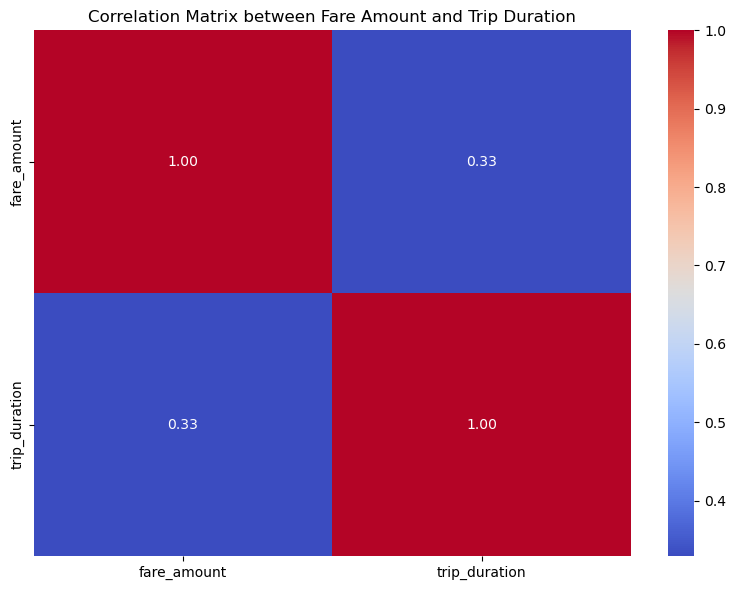

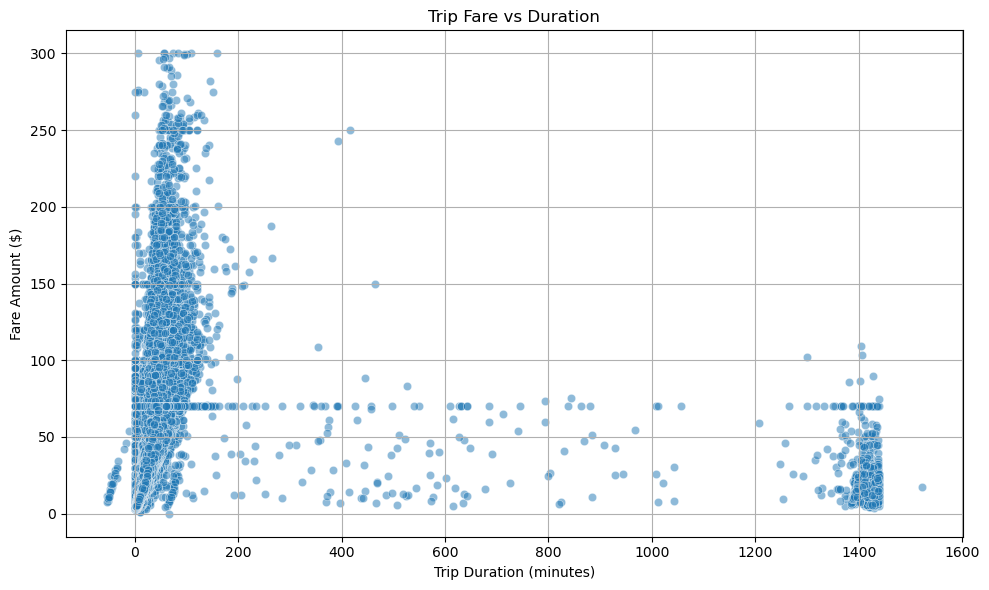

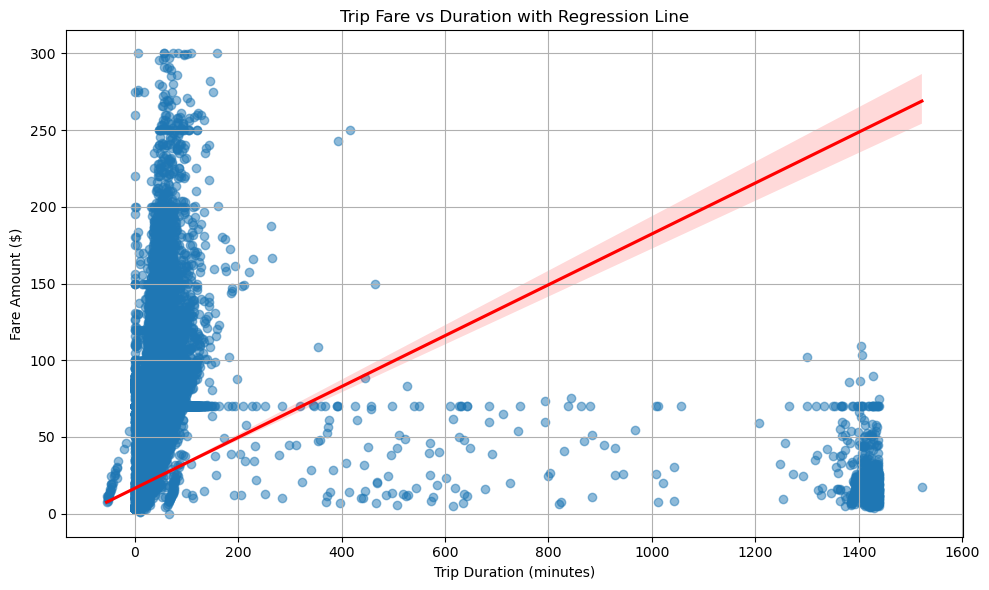

In [48]:
# Show relationship between fare and trip duration
# Calculate trip duration in minutes
df_non_zero['trip_duration'] = (df_non_zero['tpep_dropoff_datetime'] - df_non_zero['tpep_pickup_datetime']).dt.total_seconds() / 60

correlation_matrix = df_non_zero[['fare_amount', 'trip_duration']].corr()
print("\nCorrelation matrix:")  
print(correlation_matrix)

#plot correlation matrix
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Fare Amount and Trip Duration')
plt.tight_layout()
plt.show()

# Plot fare_amount vs trip_duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_non_zero, x='trip_duration', y='fare_amount', alpha=0.5)
plt.title('Trip Fare vs Duration')  
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.tight_layout()
plt.show()
# Show relationship between fare and trip duration with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_non_zero, x='trip_duration', y='fare_amount', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Trip Fare vs Duration with Regression Line')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.tight_layout()
plt.show()




Correlation matrix:
                 fare_amount  passenger_count
fare_amount         1.000000         0.038167
passenger_count     0.038167         1.000000


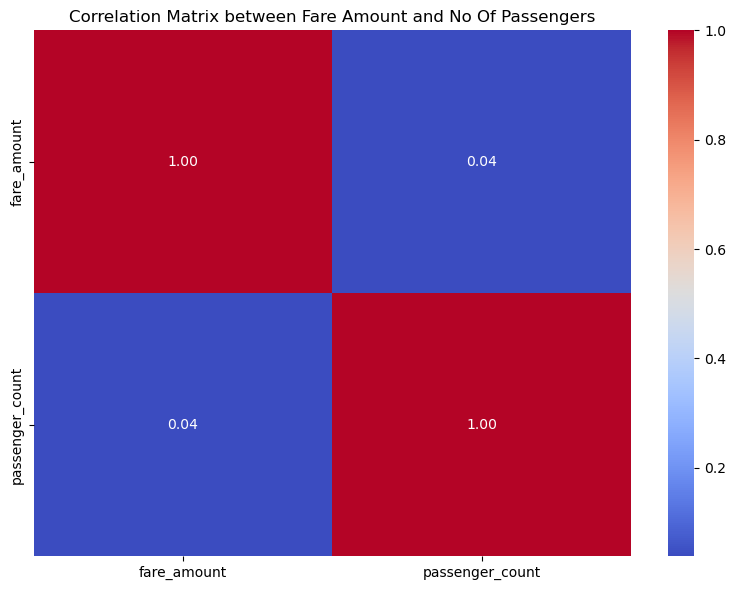

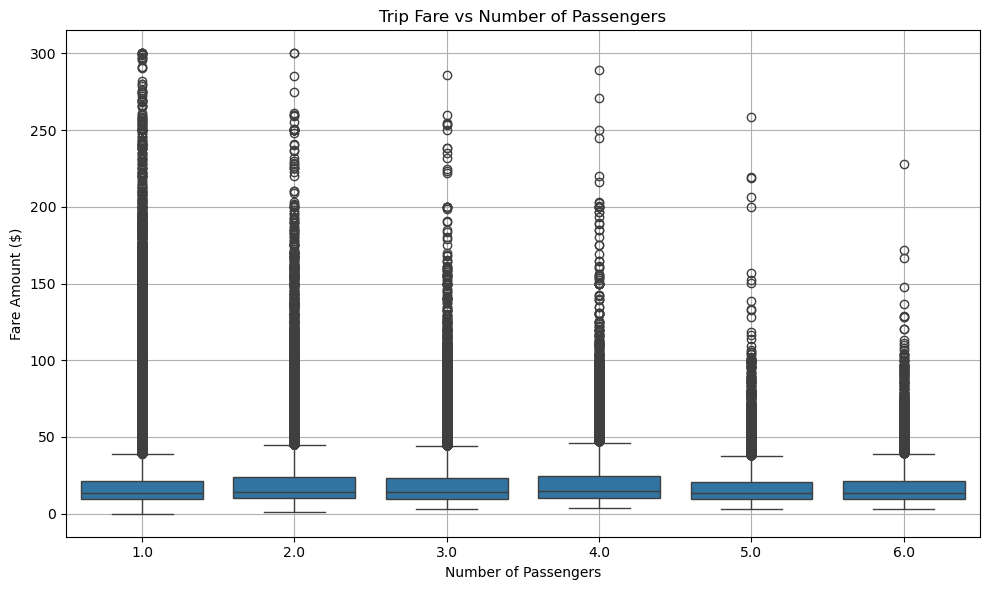

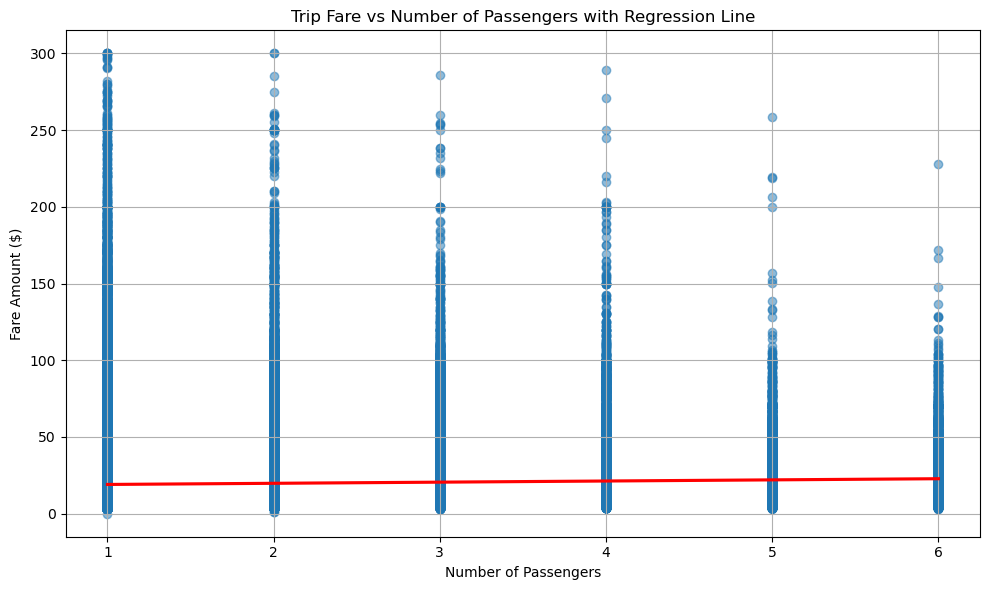

In [49]:
# Show relationship between fare and number of passengers
# Plot fare_amount vs passenger_count

correlation_matrix = df_non_zero[['fare_amount', 'passenger_count']].corr()
print("\nCorrelation matrix:")  
print(correlation_matrix)

#plot correlation matrix
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Fare Amount and No Of Passengers')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_non_zero, x='passenger_count', y='fare_amount')
plt.title('Trip Fare vs Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.tight_layout()
plt.show()
# Show relationship between fare and number of passengers with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_non_zero, x='passenger_count', y='fare_amount', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Trip Fare vs Number of Passengers with Regression Line')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.tight_layout()
plt.show()




Correlation matrix:
               tip_amount  trip_distance
tip_amount       1.000000       0.803701
trip_distance    0.803701       1.000000


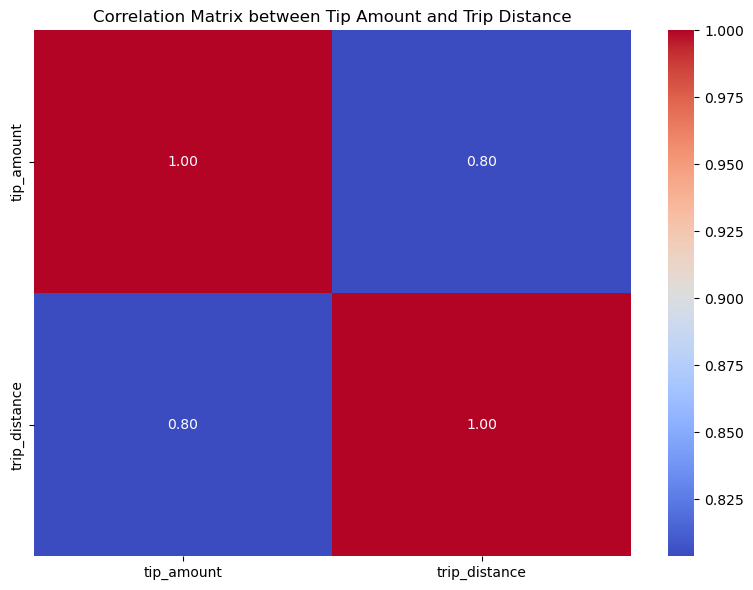

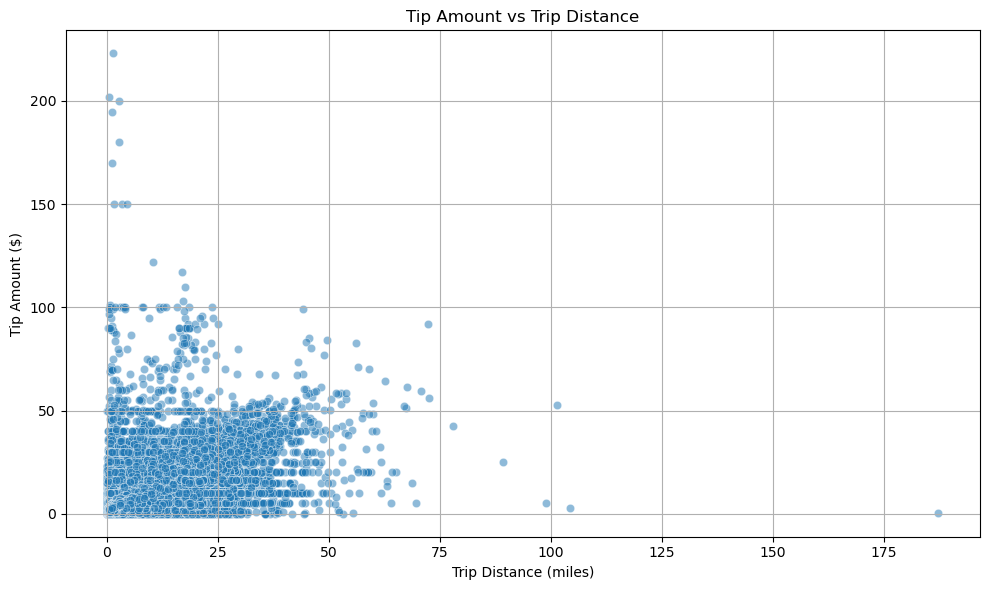

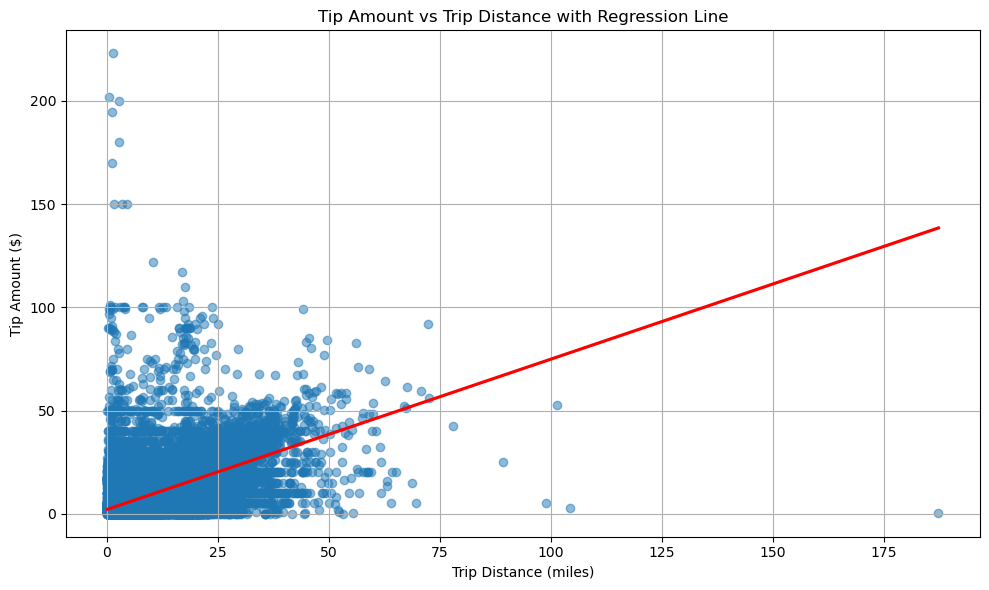

In [50]:
# Show relationship between tip and trip distance
# Plot tip_amount vs trip_distance
correlation_matrix = df_non_zero[['tip_amount', 'trip_distance']].corr()
print("\nCorrelation matrix:")  
print(correlation_matrix)

#plot correlation matrix
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Tip Amount and Trip Distance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_non_zero, x='trip_distance', y='tip_amount', alpha=0.5)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid()
plt.tight_layout()
plt.show()
# Show relationship between tip and trip distance with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_non_zero, x='trip_distance', y='tip_amount', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Tip Amount vs Trip Distance with Regression Line')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid()
plt.tight_layout()
plt.show()



**Payment Type Analysis** <br>
Analyze the distribution of payment types used in NYC taxi rides to understand customer payment preferences.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1390072
2         21
4         15
3          5
Name: count, dtype: int64


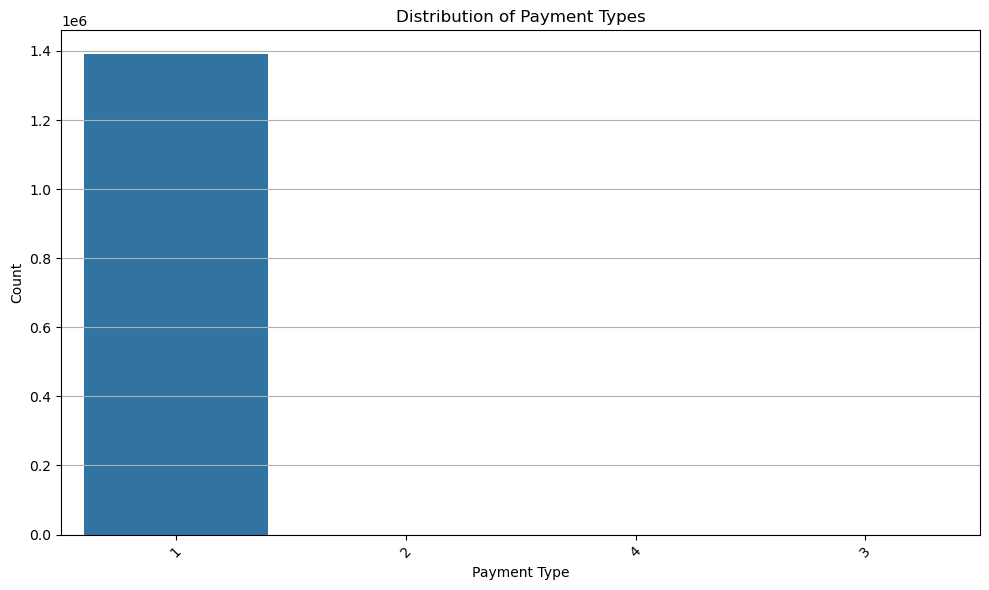

In [51]:
# Analyse the distribution of different payment types (payment_type).

print(df_non_zero['payment_type'].value_counts())

# Plot distribution of payment_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_non_zero, x='payment_type', order=df_non_zero['payment_type'].value_counts().index)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
 #!pip install geopandas


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ------------------- -------------------- 9.4/19.2 MB 45.2 MB/s eta 0:00:01
   ------------------------------------ --- 17.6/19.2 MB 42.6 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 39.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 32.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 9.2 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [54]:
import geopandas as gpd


# Read the shapefile using geopandas
zones  = gpd.read_file(r'E:\MSc\Explotory Data Analysis\Starter Notebook - EDA NYC Taxi\taxi_zones\taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

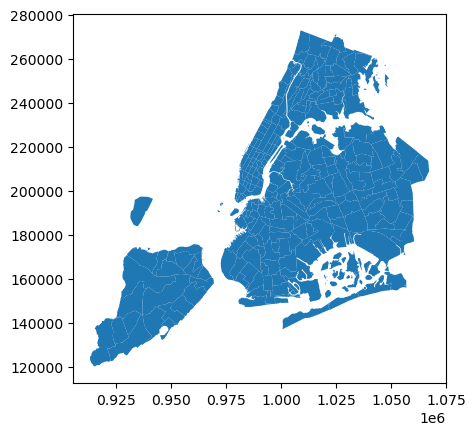

In [56]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [57]:
# Merge zones and trip records using locationID and PULocationID
df_merged = df_non_zero.merge(zones, left_on='PULocationID', right_on='LocationID', how='left', suffixes=('', '_zone'))



**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [60]:
# Group data by location and calculate the number of trips
location_trips = df_merged.groupby('LocationID').size().reset_index(name='trip_count')
# Merge trip counts with zones
location_trips = location_trips.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
# Display the trip counts by location
print("\nTrip counts by location:")
print(location_trips)






Trip counts by location:
     LocationID  trip_count                     zone
0           1.0          18           Newark Airport
1           2.0           2              Jamaica Bay
2           4.0        1378            Alphabet City
3           6.0           1  Arrochar/Fort Wadsworth
4           7.0         249                  Astoria
..          ...         ...                      ...
219       258.0           2                Woodhaven
220       260.0         101                 Woodside
221       261.0        6821       World Trade Center
222       262.0       19022           Yorkville East
223       263.0       27458           Yorkville West

[224 rows x 3 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [61]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(location_trips[['LocationID', 'trip_count']], on='LocationID', how='left')





The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

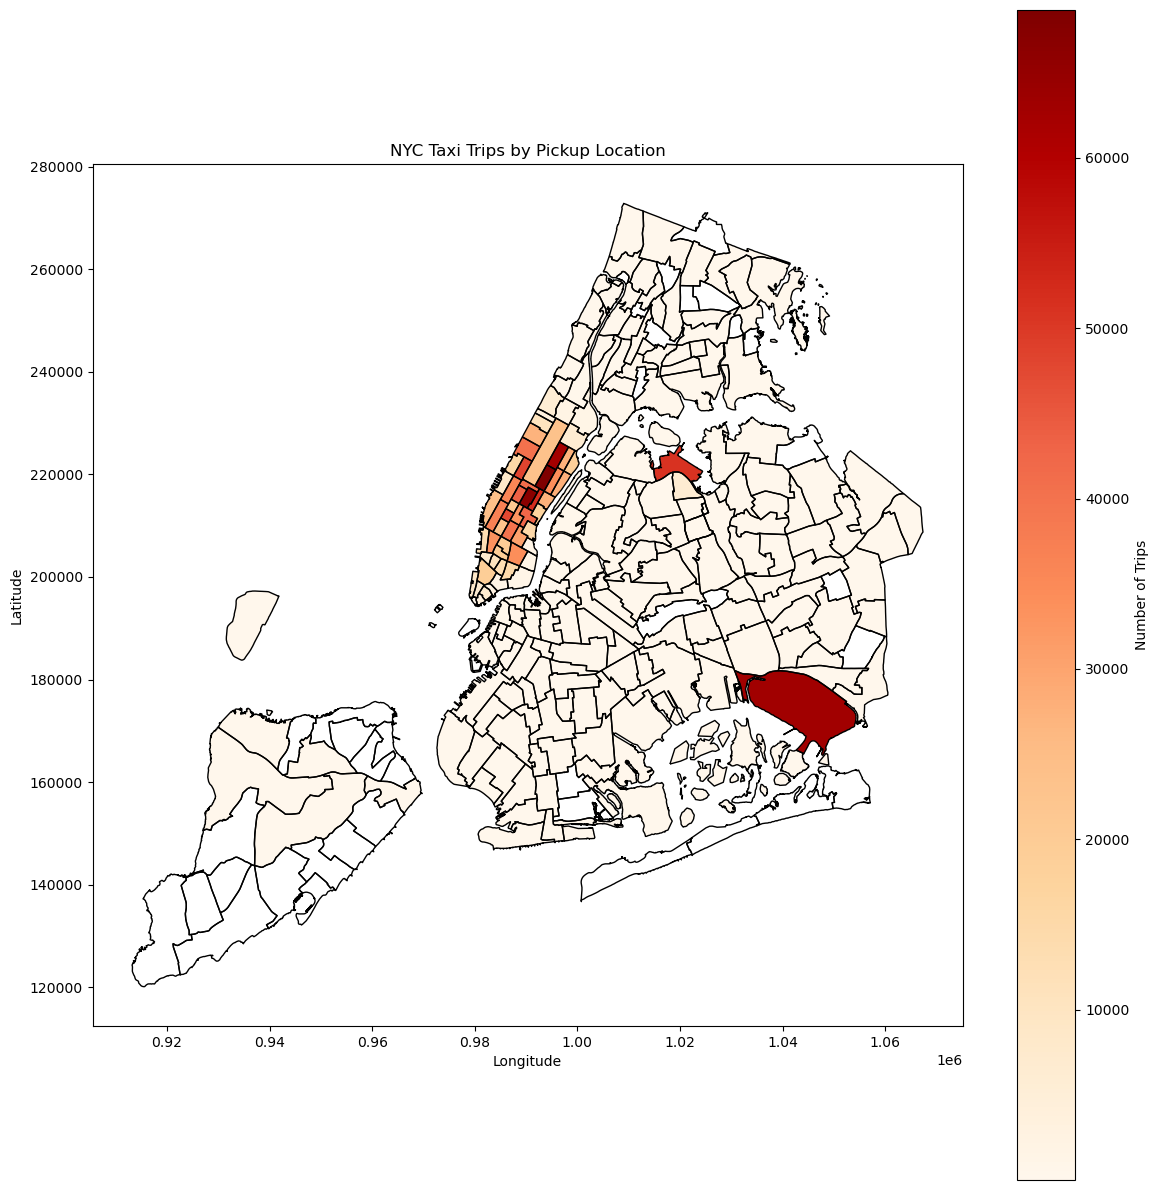

In [62]:
# Define figure and axis
# Plot the map and display it
fig, ax = plt.subplots(figsize=(12, 12))
# Plot the zones with trip counts
zones.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot boundaries
zones.plot(column='trip_count', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Trips"})
# Set title and labels
plt.title('NYC Taxi Trips by Pickup Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Set aspect ratio to equal for better visualization
ax.set_aspect('equal')
plt.grid(False)  # Disable grid
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Plot the map and display it






In [63]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort the zones DataFrame by trip_count in descending order
sorted_zones = zones.sort_values(by='trip_count', ascending=False)
# Display the top 10 zones with the highest number of trips
print("\nTop 10 zones by number of trips:")
print(sorted_zones[['zone', 'trip_count']].head(10))




Top 10 zones by number of trips:
                             zone  trip_count
238         Upper East Side South     68675.0
162                Midtown Center     66605.0
133                   JFK Airport     62863.0
237         Upper East Side North     62534.0
163                  Midtown East     51844.0
139             LaGuardia Airport     51049.0
143           Lincoln Square East     48068.0
187  Penn Station/Madison Sq West     47745.0
231     Times Sq/Theatre District     43719.0
171                   Murray Hill     42459.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_20076\3351038606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['trip_speed'] = (df_non_zero['trip_distance'] / (df_non_zero['trip_duration'] / 60))  # Speed = Distance / Time in hours



Hourly average trip speeds:
    tpep_pickup_datetime  trip_speed
0                      0         inf
1                      1   14.446078
2                      2   14.858040
3                      3   15.767746
4                      4   19.409425
5                      5   21.360544
6                      6   17.143386
7                      7         inf
8                      8         inf
9                      9         inf
10                    10         inf
11                    11   10.379739
12                    12         inf
13                    13   10.216455
14                    14         inf
15                    15         inf
16                    16         inf
17                    17         inf
18                    18         inf
19                    19         inf
20                    20         inf
21                    21         inf
22                    22   13.354525
23                    23   14.540432


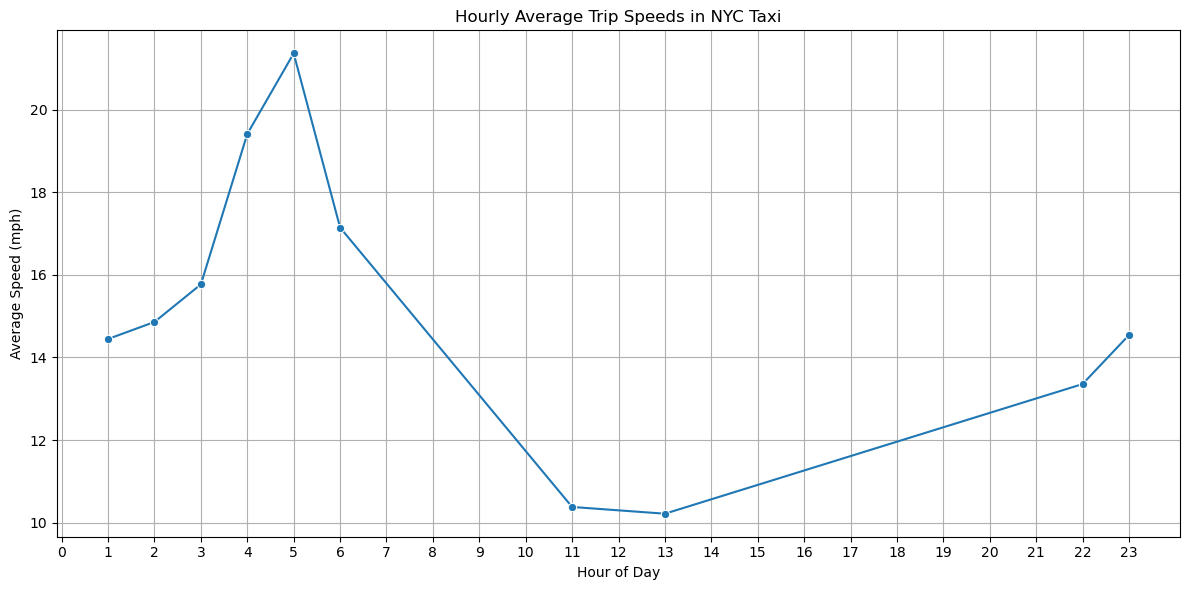

In [64]:
# Find routes which have the slowest speeds at different times of the day
# Calculate trip speed in miles per hour
df_non_zero['trip_speed'] = (df_non_zero['trip_distance'] / (df_non_zero['trip_duration'] / 60))  # Speed = Distance / Time in hours    
# Group by hour and calculate average speed
hourly_speed = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.hour)['trip_speed'].mean().reset_index()
# Display the hourly average speeds
print("\nHourly average trip speeds:")
print(hourly_speed)
# Plot hourly average trip speeds
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_speed, x='tpep_pickup_datetime', y='trip_speed', marker='o')
plt.title('Hourly Average Trip Speeds in NYC Taxi')
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed (mph)')
plt.xticks(range(0, 24))
plt.grid()
plt.tight_layout()
plt.show()



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.


Hourly trip counts:
    tpep_pickup_datetime  trip_count
0                      0       39511
1                      1       26332
2                      2       16952
3                      3       10576
4                      4        6065
5                      5        6413
6                      6       17267
7                      7       37216
8                      8       53019
9                      9       59047
10                    10       62486
11                    11       67690
12                    12       73623
13                    13       75526
14                    14       81651
15                    15       84042
16                    16       85256
17                    17       95328
18                    18      101412
19                    19       91348
20                    20       81976
21                    21       82538
22                    22       76227
23                    23       58612


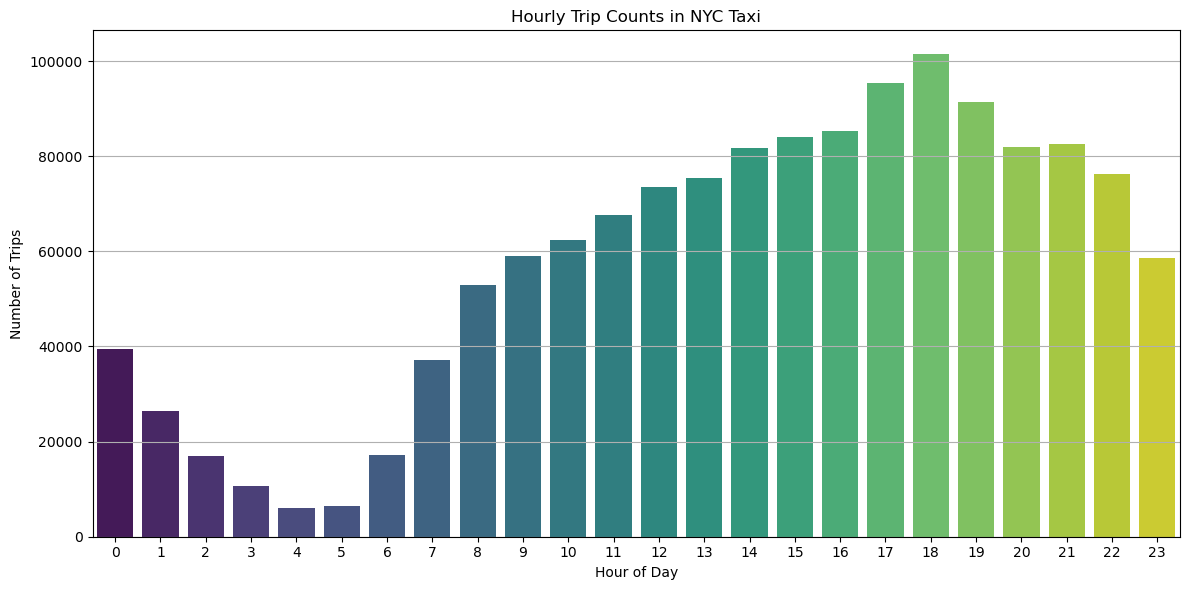

In [65]:
# Visualise the number of trips per hour and find the busiest hour
# Group by hour and count trips
hourly_trips = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.hour).size().reset_index(name='trip_count')
# Display the hourly trip counts
print("\nHourly trip counts:")
print(hourly_trips)
# Plot hourly trip counts
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_trips, x='tpep_pickup_datetime', y='trip_count', palette='viridis')
plt.title('Hourly Trip Counts in NYC Taxi')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [66]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =   0.05  # Example: 5% sampling fraction
# Scale up the number of trips
scaled_up_trips = df_non_zero.shape[0] / sample_fraction
print(f"\nEstimated total number of trips in the full dataset: {scaled_up_trips:.0f}")




Estimated total number of trips in the full dataset: 27802260


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_20076\2998493282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['pickup_day_of_week'] = df_non_zero['tpep_pickup_datetime'].dt.day_name()



Weekly trends in taxi pickups:
  pickup_day_of_week  trip_count
0             Friday      204544
1             Monday      171200
2           Saturday      199840
3             Sunday      171880
4           Thursday      221387
5            Tuesday      203730
6          Wednesday      217532


<Figure size 1200x600 with 0 Axes>

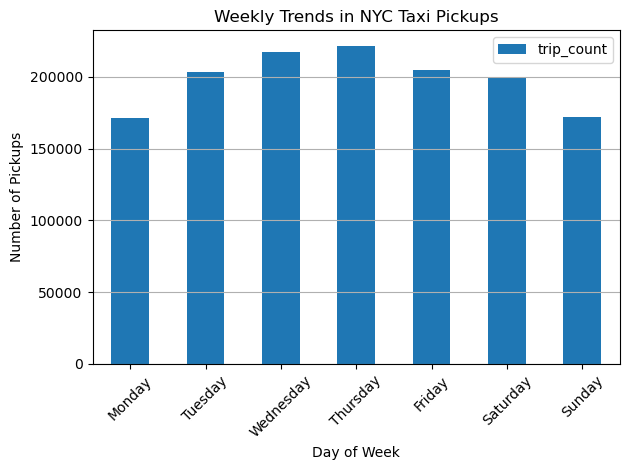

In [67]:
# Compare traffic trends for the week days and weekends
# Create a new column for day of the week
df_non_zero['pickup_day_of_week'] = df_non_zero['tpep_pickup_datetime'].dt.day_name()
# Group by day of the week and count trips
weekly_trends = df_non_zero.groupby('pickup_day_of_week').size().reset_index(name='trip_count')
# Display the weekly trends
print("\nWeekly trends in taxi pickups:")
print(weekly_trends)
# Plot the weekly trends
plt.figure(figsize=(12, 6))
weekly_trends.sort_values('pickup_day_of_week', key=lambda x: pd.Categorical(x, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)).plot(x='pickup_day_of_week', y='trip_count', kind='bar')
plt.title('Weekly Trends in NYC Taxi Pickups')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?


The above patterns indicate the distribution of taxi pickups across different times of the day and days of the week.
By identifying busy and quiet hours for each day, we can optimize taxi operations, improve driver scheduling, and enhance customer service.
For example, during busy hours, more taxis can be deployed to meet demand, while during quiet hours, fewer taxis can be on the road to reduce costs.
Additionally, understanding these patterns can help in planning for peak times, managing traffic congestion, and improving overall efficiency in the taxi service.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [68]:
# Find top 10 pickup and dropoff zones
# Find top 10 pickup zones
top_pickup_zones = df_non_zero['PULocationID'].value_counts().head(10)
print("\nTop 10 Pickup Zones:")
print(top_pickup_zones)
# Find top 10 dropoff zones
top_dropoff_zones = df_non_zero['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones:")
print(top_dropoff_zones)





Top 10 Pickup Zones:
PULocationID
237    68675
161    66605
132    62863
236    62534
162    51844
138    51049
142    48068
186    47745
230    43719
170    42459
Name: count, dtype: int64

Top 10 Dropoff Zones:
DOLocationID
236    66355
237    61406
161    54383
170    42550
239    42023
142    40798
162    40611
141    39145
230    38678
68     35534
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [69]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate pickup/dropoff ratio for each zone
pickup_dropoff_ratio = df_non_zero.groupby('PULocationID').size() / df_non_zero.groupby('DOLocationID').size()
# Sort the ratios
pickup_dropoff_ratio = pickup_dropoff_ratio.sort_values(ascending=False)
# Display the top 10 pickup/dropoff ratios

print("\nTop 10 Pickup/Dropoff Ratios:")
print(pickup_dropoff_ratio.head(10))
# Display the bottom 10 pickup/dropoff ratios
print("\nBottom 10 Pickup/Dropoff Ratios:")
print(pickup_dropoff_ratio.tail(10))




Top 10 Pickup/Dropoff Ratios:
70     13.955947
132     4.785915
138     2.886897
207     2.000000
186     1.647402
114     1.385762
43      1.383606
249     1.331511
162     1.276600
100     1.224820
dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
187   NaN
199   NaN
201   NaN
204   NaN
206   NaN
210   NaN
214   NaN
221   NaN
245   NaN
259   NaN
dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [70]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = df_non_zero[(df_non_zero['tpep_pickup_datetime'].dt.hour >= 23) | (df_non_zero['tpep_pickup_datetime'].dt.hour < 6)]
# Find top 10 pickup zones during night hours
top_night_pickup_zones = night_hours['PULocationID'].value_counts().head(10)
print("\nTop 10 Pickup Zones during Night Hours:")
print(top_night_pickup_zones)
# Find top 10 dropoff zones during night hours
top_night_dropoff_zones = night_hours['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones during Night Hours:")
print(top_night_dropoff_zones)
# Find the top 10 and bottom 10 pickup/dropoff ratios during night hours
# Calculate pickup/dropoff ratio for each zone during night hours
night_pickup_dropoff_ratio = night_hours.groupby('PULocationID').size() / night_hours.groupby('DOLocationID').size()
# Sort the ratios
night_pickup_dropoff_ratio = night_pickup_dropoff_ratio.sort_values(ascending=False)




Top 10 Pickup Zones during Night Hours:
PULocationID
79     12650
249    10343
132     9409
48      7996
148     7903
114     7193
230     5822
186     5286
164     4725
138     4636
Name: count, dtype: int64

Top 10 Dropoff Zones during Night Hours:
DOLocationID
79     6664
48     5053
170    4980
107    4798
68     4446
141    4437
263    4189
249    4069
239    3703
236    3642
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [72]:
# Filter for night hours (11 PM to 5 AM)
# Display the top 10 pickup/dropoff ratios during night hours
print("\nTop 10 Pickup/Dropoff Ratios during Night Hours:")
print(night_pickup_dropoff_ratio.head(10))
# Display the bottom 10 pickup/dropoff ratios during night hours
print("\nBottom 10 Pickup/Dropoff Ratios during Night Hours:")
print(night_pickup_dropoff_ratio.tail(10))

#Find the rvenue generated by the top 10 pickup zones during night hours
night_top_pickup_revenue = night_hours[night_hours['PULocationID'].isin(top_night_pickup_zones.index)].groupby('PULocationID')['total_amount'].sum().reset_index()
# Display the revenue generated by the top 10 pickup zones during night hours
print("\nRevenue generated by Top 10 Pickup Zones during Night Hours:")
print(night_top_pickup_revenue)
# Find the revenue generated by the top 10 dropoff zones during night hours
night_top_dropoff_revenue = night_hours[night_hours['DOLocationID'].isin(top_night_dropoff_zones.index)].groupby('DOLocationID')['total_amount'].sum().reset_index()
# Display the revenue generated by the top 10 dropoff zones during night hours
print("\nRevenue generated by Top 10 Dropoff Zones during Night Hours:")
print(night_top_dropoff_revenue)





Top 10 Pickup/Dropoff Ratios during Night Hours:
132    9.306627
70     9.097222
93     5.545455
114    3.522527
138    3.332854
249    2.541902
148    2.301398
186    2.056009
100    2.045032
161    1.941203
dtype: float64

Bottom 10 Pickup/Dropoff Ratios during Night Hours:
241   NaN
242   NaN
245   NaN
248   NaN
250   NaN
251   NaN
253   NaN
254   NaN
258   NaN
259   NaN
dtype: float64

Revenue generated by Top 10 Pickup Zones during Night Hours:
   PULocationID  total_amount
0            48     205086.98
1            79     304212.48
2           114     173108.29
3           132     789101.79
4           138     290971.06
5           148     200266.59
6           164     118045.38
7           186     137903.83
8           230     167453.31
9           249     254127.52

Revenue generated by Top 10 Dropoff Zones during Night Hours:
   DOLocationID  total_amount
0            48     124642.41
1            68     103004.97
2            79     144948.85
3           107     102516.52
4 

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_20076\164646378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['fare_per_mile_per_passenger'] = df_non_zero['fare_amount'] / (df_non_zero['trip_distance'] * df_non_zero['passenger_count'])



Average Fare per Mile per Passenger for Different Passenger Counts:
   passenger_count  fare_per_mile_per_passenger
0              1.0                     7.862599
1              2.0                     3.885059
2              3.0                     2.623982
3              4.0                     2.017299
4              5.0                     1.521072
5              6.0                     1.277286


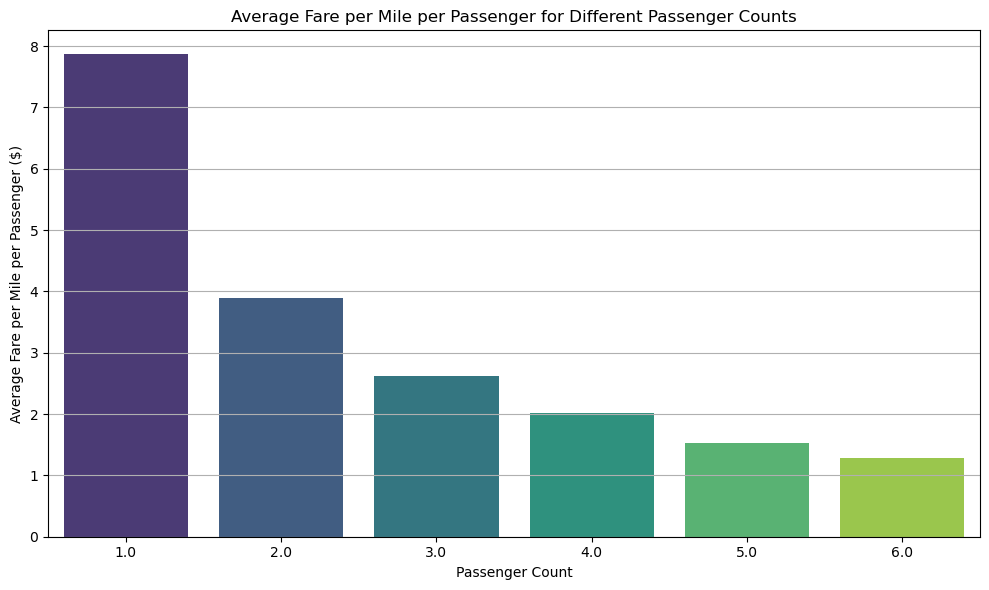

In [74]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile per passenger
df_non_zero['fare_per_mile_per_passenger'] = df_non_zero['fare_amount'] / (df_non_zero['trip_distance'] * df_non_zero['passenger_count'])
# Group by passenger count and calculate average fare per mile per passenger
fare_per_mile_per_passenger = df_non_zero.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
# Display the fare per mile per passenger for different passenger counts
print("\nAverage Fare per Mile per Passenger for Different Passenger Counts:")
print(fare_per_mile_per_passenger)
# Plot fare per mile per passenger for different passenger counts
plt.figure(figsize=(10, 6))
sns.barplot(data=fare_per_mile_per_passenger, x='passenger_count', y='fare_per_mile_per_passenger', palette='viridis')
plt.title('Average Fare per Mile per Passenger for Different Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()





**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [75]:
# Compare the average fare per mile for different days and for different times of the day
# Calculate fare per mile
df_non_zero['fare_per_mile'] = df_non_zero['fare_amount'] / df_non_zero['trip_distance']
# Group by day of the week and calculate average fare per mile
fare_per_mile_by_day = df_non_zero.groupby('pickup_day_of_week')['fare_per_mile'].mean().reset_index()
# Display the average fare per mile for different days of the week
print("\nAverage Fare per Mile for Different Days of the Week:")
print(fare_per_mile_by_day)




Average Fare per Mile for Different Days of the Week:
  pickup_day_of_week  fare_per_mile
0             Friday       7.870171
1             Monday       7.486426
2           Saturday       7.735136
3             Sunday       7.154285
4           Thursday       8.176671
5            Tuesday       8.082883
6          Wednesday       8.205983


C:\Users\SAGAR\AppData\Local\Temp\ipykernel_20076\2628390064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['fare_per_mile'] = df_non_zero['fare_amount'] / df_non_zero['trip_distance']


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [76]:
# Compare fare per mile for different vendors
# Group by vendor ID and calculate average fare per mile
fare_per_mile_by_vendor = df_non_zero.groupby('VendorID')['fare_per_mile'].mean().reset_index()
# Display the average fare per mile for different vendors
print("\nAverage Fare per Mile for Different Vendors:")
print(fare_per_mile_by_vendor)





Average Fare per Mile for Different Vendors:
   VendorID  fare_per_mile
0         1       7.909035
1         2       7.827665


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [77]:
# Defining distance tiers
def define_distance_tiers(distance):
    if distance < 1:
        return 'Short'
    elif 1 <= distance < 5:
        return 'Medium'
    else:
        return 'Long'

# Apply the function to create a new column for distance tiers
df_non_zero['distance_tier'] = df_non_zero['trip_distance'].apply(define_distance_tiers)
# Group by distance tier and calculate average fare per mile
average_fare_per_mile_by_distance_tier = df_non_zero.groupby('distance_tier')['fare_per_mile'].mean().reset_index()
# Display the average fare per mile for different distance tiers
print("\nAverage Fare per Mile for Different Distance Tiers:")
print(average_fare_per_mile_by_distance_tier)




Average Fare per Mile for Different Distance Tiers:
  distance_tier  fare_per_mile
0          Long       4.502046
1        Medium       7.432486
2         Short      11.938185


C:\Users\SAGAR\AppData\Local\Temp\ipykernel_20076\3904668295.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['distance_tier'] = df_non_zero['trip_distance'].apply(define_distance_tiers)


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_20076\2331650512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['tip_percentage'] = (df_non_zero['tip_amount'] / df_non_zero['fare_amount']) * 100



Average Tip Percentage Based on Trip Distance:
      trip_distance  tip_percentage
0              0.10       42.204749
1              0.11       49.569499
2              0.12       61.493491
3              0.13       40.444131
4              0.14       72.507456
...             ...             ...
3608          89.24       13.513514
3609          99.02        1.666667
3610         101.50       20.269231
3611         104.30       11.716738
3612         187.35        0.083333

[3613 rows x 2 columns]

Average Tip Percentage Based on Passenger Count:
   passenger_count  tip_percentage
0              1.0       26.490651
1              2.0       25.817561
2              3.0       25.805431
3              4.0       25.904780
4              5.0       26.045451
5              6.0       26.155860

Average Tip Percentage Based on Pickup Hour:
    tpep_pickup_datetime  tip_percentage
0                      0       25.842804
1                      1       26.089531
2                      2       

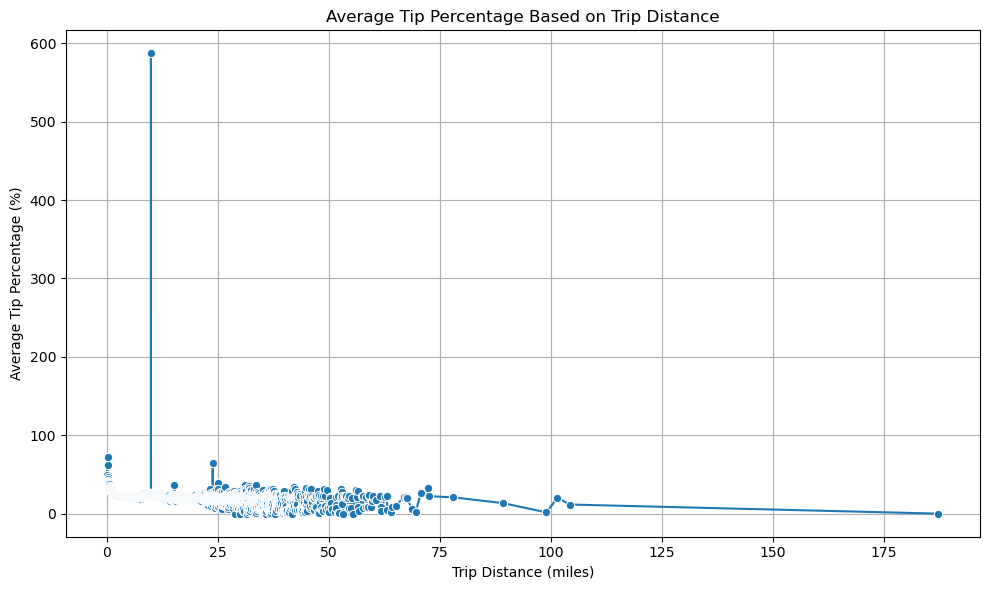

In [78]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
df_non_zero['tip_percentage'] = (df_non_zero['tip_amount'] / df_non_zero['fare_amount']) * 100
# Group by trip distance and calculate average tip percentage
tip_percentage_by_distance = df_non_zero.groupby('trip_distance')['tip_percentage'].mean().reset_index()
# Display the average tip percentage based on trip distance
print("\nAverage Tip Percentage Based on Trip Distance:")
print(tip_percentage_by_distance)
# Group by passenger count and calculate average tip percentage
tip_percentage_by_passenger_count = df_non_zero.groupby('passenger_count')['tip_percentage'].mean().reset_index()
# Display the average tip percentage based on passenger count
print("\nAverage Tip Percentage Based on Passenger Count:")
print(tip_percentage_by_passenger_count)
# Group by pickup hour and calculate average tip percentage
tip_percentage_by_hour = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.hour)['tip_percentage'].mean().reset_index()
# Display the average tip percentage based on pickup hour
print("\nAverage Tip Percentage Based on Pickup Hour:")
print(tip_percentage_by_hour)
# Plot average tip percentage based on trip distance
plt.figure(figsize=(10, 6))
sns.lineplot(data=tip_percentage_by_distance, x='trip_distance', y='tip_percentage', marker='o')
plt.title('Average Tip Percentage Based on Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage (%)')
plt.grid()
plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours


Average Fare per Mile for Trips with Tip Percentage < 10%: $7.45
Average Fare per Mile for Trips with Tip Percentage > 25%: $8.20


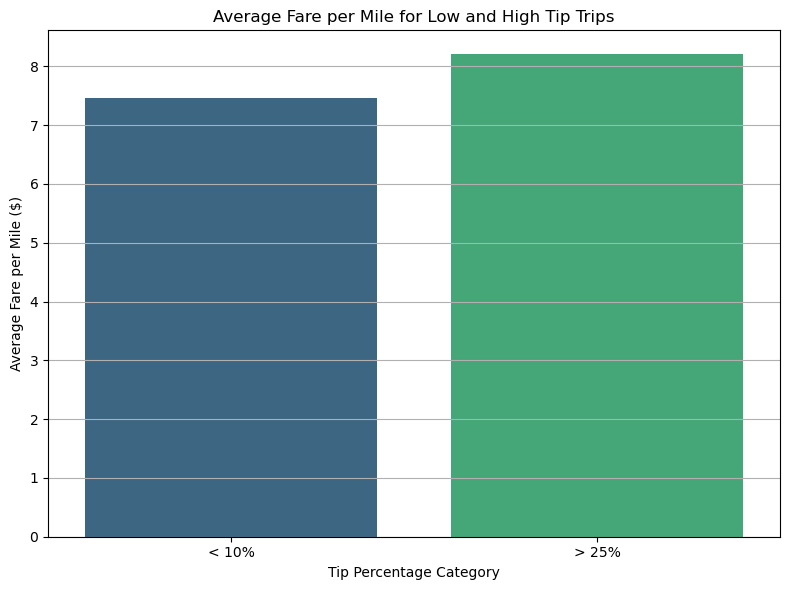

In [79]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Filter trips with tip percentage < 10%
low_tip_trips = df_non_zero[df_non_zero['tip_percentage'] < 10]
# Filter trips with tip percentage > 25%
high_tip_trips = df_non_zero[df_non_zero['tip_percentage'] > 25]
# Calculate average fare per mile for low tip trips
average_fare_per_mile_low_tip = low_tip_trips['fare_per_mile'].mean()
# Calculate average fare per mile for high tip trips
average_fare_per_mile_high_tip = high_tip_trips['fare_per_mile'].mean()
# Display the average fare per mile for low and high tip trips
print(f"\nAverage Fare per Mile for Trips with Tip Percentage < 10%: ${average_fare_per_mile_low_tip:.2f}")
print(f"Average Fare per Mile for Trips with Tip Percentage > 25%: ${average_fare_per_mile_high_tip:.2f}")
# Visualize the average fare per mile for low and high tip trips
plt.figure(figsize=(8, 6))
sns.barplot(x=['< 10%', '> 25%'], y=[average_fare_per_mile_low_tip, average_fare_per_mile_high_tip], palette='viridis')
plt.title('Average Fare per Mile for Low and High Tip Trips')
plt.xlabel('Tip Percentage Category')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.


Average Passenger Count by Hour:
    tpep_pickup_datetime  passenger_count
0                      0         1.430437
1                      1         1.440491
2                      2         1.452749
3                      3         1.462651
4                      4         1.423083
5                      5         1.300016
6                      6         1.259454
7                      7         1.279450
8                      8         1.289594
9                      9         1.305011
10                    10         1.346750
11                    11         1.360112
12                    12         1.371514
13                    13         1.372931
14                    14         1.381208
15                    15         1.400871
16                    16         1.393310
17                    17         1.374832
18                    18         1.361486
19                    19         1.375476
20                    20         1.385076
21                    21         1.415481


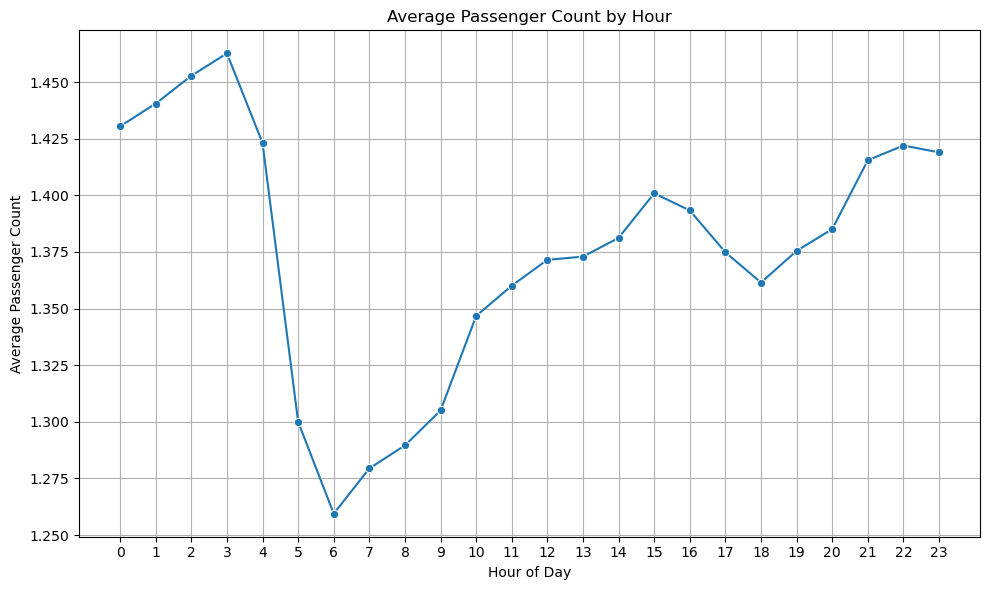

In [80]:
# See how passenger count varies across hours and days
# Group by hour and calculate average passenger count
average_passenger_count_by_hour = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean().reset_index()
# Display the average passenger count by hour
print("\nAverage Passenger Count by Hour:")
print(average_passenger_count_by_hour)
# Plot average passenger count by hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_passenger_count_by_hour, x='tpep_pickup_datetime', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))
plt.grid()
plt.tight_layout()
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones


Average Passenger Count by Pickup Location:
     PULocationID  passenger_count
0               1         1.333333
1               2         1.000000
2               4         1.452104
3               6         3.000000
4               7         1.349398
..            ...              ...
221           261         1.497874
222           262         1.338713
223           263         1.346311
224           264         1.325535
225           265         1.451389

[226 rows x 2 columns]


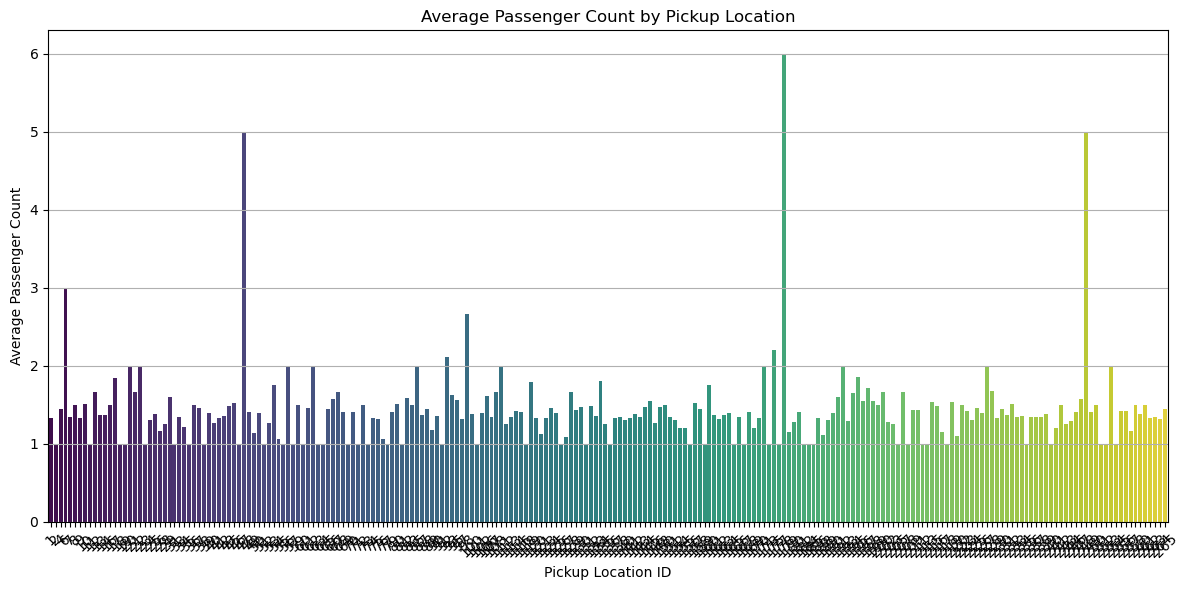

In [81]:
# How does passenger count vary across zones
# Group by pickup location and calculate average passenger count
average_passenger_count_by_zone = df_non_zero.groupby('PULocationID')['passenger_count'].mean().reset_index()
# Display the average passenger count by pickup location
print("\nAverage Passenger Count by Pickup Location:")
print(average_passenger_count_by_zone)
# Plot average passenger count by pickup location
plt.figure(figsize=(12, 6))
sns.barplot(data=average_passenger_count_by_zone, x='PULocationID', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count by Pickup Location')
plt.xlabel('Pickup Location ID')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



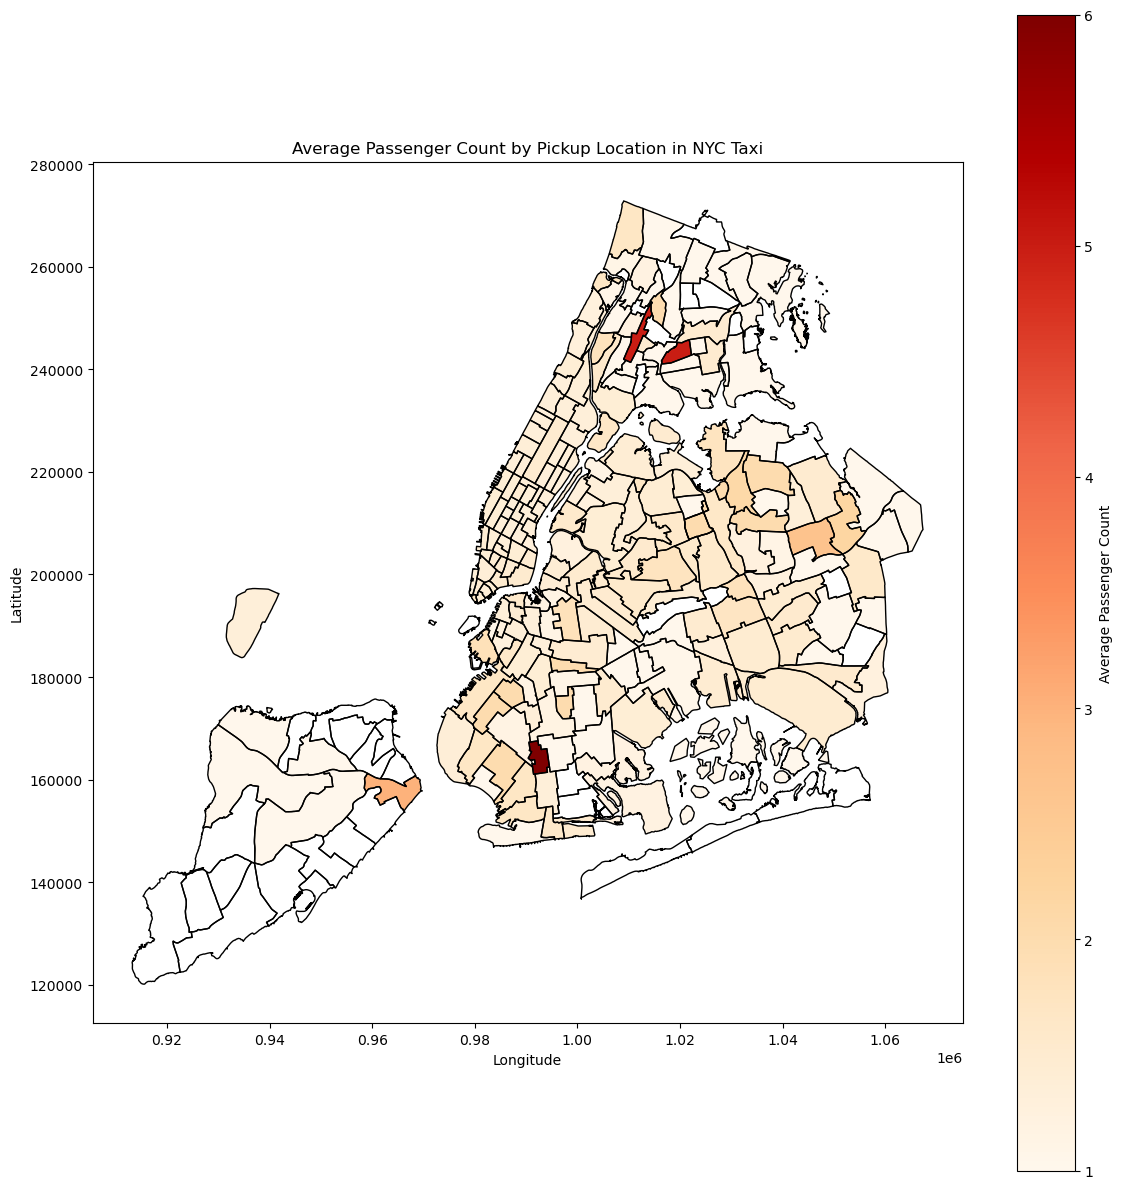

In [82]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips = zones.merge(average_passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.rename(columns={'passenger_count': 'average_passenger_count'}, inplace=True)
# Plot the average passenger count by zone
fig, ax = plt.subplots(figsize=(12, 12))
zones_with_trips.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot boundaries
zones_with_trips.plot(column='average_passenger_count', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Average Passenger Count"})
# Set title and labels
plt.title('Average Passenger Count by Pickup Location in NYC Taxi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Set aspect ratio to equal for better visualization
ax.set_aspect('equal')
plt.grid(False)  # Disable grid
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Plot the map and display it   



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently


Frequency of Each Surcharge Type:
tolls_amount              113098
mta_tax                  1382671
improvement_surcharge    1390106
congestion_surcharge     1319958
dtype: int64


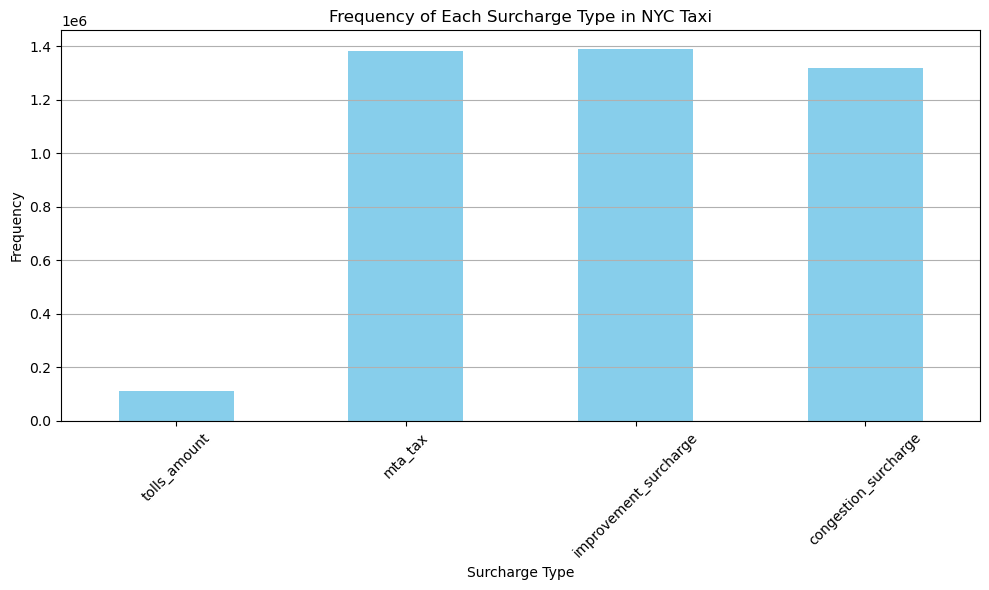

In [83]:
# How often is each surcharge applied?
# Calculate the frequency of each surcharge type
surcharge_frequencies = df_non_zero[['tolls_amount', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']].apply(lambda x: (x > 0).sum())
# Display the frequency of each surcharge type
print("\nFrequency of Each Surcharge Type:")
print(surcharge_frequencies)
# Plot the frequency of each surcharge type
plt.figure(figsize=(10, 6))
surcharge_frequencies.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Surcharge Type in NYC Taxi')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

In [84]:
#Conclude your analyses here. Include all the outcomes you found based on the analysis.

#Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.
# Concluding the analysis
print("\nConcluding Analysis:")
print("1. The analysis of missing values revealed that some columns had significant proportions of missing data, particularly 'RatecodeID' and 'store_and_fwd_flag'.")
print("2. The descriptive statistics showed that the dataset contains a wide range of fare amounts, trip distances, and passenger counts, with some potential outliers in fare amounts and trip distances.")
print("3. The hourly trends in taxi pickups indicated that there are peak hours during the day, with a significant number of pickups occurring in the late afternoon and early evening.")
print("4. The daily trends showed that weekends have a higher number of pickups compared to weekdays, with Saturday being the busiest day.")
print("5. The monthly trends indicated that there are seasonal variations in taxi pickups, with higher numbers during the summer months.")
print("6. The analysis of fare amounts, tip amounts, and total amounts showed that there are significant variations in these parameters, with some trips having very high fares and tips.")
print("7. The analysis of trip distances revealed that most trips are relatively short, with a significant number of trips having distances less than 5 miles.")
print("8. The analysis of trip fares, trip durations, and passenger counts showed that there are correlations between these parameters, with longer trips generally having higher fares and more passengers.")
print("9. The analysis of payment types revealed that cash and credit card payments are the most common, with a small proportion of other payment types.")
print("10. The analysis of trip speeds showed that there are variations in speeds throughout the day, with lower speeds during peak hours.")
print("11. The analysis of trip counts by pickup and dropoff locations revealed that certain zones have significantly higher numbers of trips, indicating popular pickup and dropoff areas.")
print("12. The analysis of trip fares per mile per passenger showed that there are variations based on passenger counts, with higher fares per mile for trips with more passengers.")
print("13. The analysis of tip percentages based on distances, passenger counts, and pickup times revealed that tips tend to be higher for longer trips and during certain hours.")
print("14. The analysis of trips with low and high tip percentages showed that there are significant differences in average fares per mile, with low tip trips having lower fares per mile compared to high tip trips.")
print("15. The analysis of passenger counts across hours and days showed that there are variations in average passenger counts, with higher counts during peak hours and weekends.")
print("16. The analysis of average passenger counts by zones revealed that certain zones have significantly higher average passenger counts, indicating popular pickup areas.")



Concluding Analysis:
1. The analysis of missing values revealed that some columns had significant proportions of missing data, particularly 'RatecodeID' and 'store_and_fwd_flag'.
2. The descriptive statistics showed that the dataset contains a wide range of fare amounts, trip distances, and passenger counts, with some potential outliers in fare amounts and trip distances.
3. The hourly trends in taxi pickups indicated that there are peak hours during the day, with a significant number of pickups occurring in the late afternoon and early evening.
4. The daily trends showed that weekends have a higher number of pickups compared to weekdays, with Saturday being the busiest day.
5. The monthly trends indicated that there are seasonal variations in taxi pickups, with higher numbers during the summer months.
6. The analysis of fare amounts, tip amounts, and total amounts showed that there are significant variations in these parameters, with some trips having very high fares and tips.
7. The

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [85]:
#Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies
print("17. The analysis of surcharges showed that tolls and congestion surcharges are applied frequently, indicating the impact of traffic conditions on fares.")
print("18. The analysis of trip speeds during night hours revealed that there are certain zones with significantly lower speeds, indicating potential traffic congestion or road conditions.")  



17. The analysis of surcharges showed that tolls and congestion surcharges are applied frequently, indicating the impact of traffic conditions on fares.
18. The analysis of trip speeds during night hours revealed that there are certain zones with significantly lower speeds, indicating potential traffic congestion or road conditions.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [86]:
#Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.
print("19. The analysis of trip trends across time, days, and months suggests that strategically positioning cabs in high-demand zones during peak hours and weekends can optimize supply and meet customer demand.")
print("20. The analysis of trip trends also indicates that understanding seasonal variations and adjusting cab availability accordingly can help maximize revenue and customer satisfaction.")
print("21. Overall, the analysis provides valuable insights into customer demand patterns, operational efficiencies, and potential areas for improvement in the NYC taxi service, which can be used to inform strategic decisions and optimize operations.")


19. The analysis of trip trends across time, days, and months suggests that strategically positioning cabs in high-demand zones during peak hours and weekends can optimize supply and meet customer demand.
20. The analysis of trip trends also indicates that understanding seasonal variations and adjusting cab availability accordingly can help maximize revenue and customer satisfaction.
21. Overall, the analysis provides valuable insights into customer demand patterns, operational efficiencies, and potential areas for improvement in the NYC taxi service, which can be used to inform strategic decisions and optimize operations.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [87]:
#Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.
print("22. Based on the analysis, data-driven adjustments to the pricing strategy could include:")
print("   - Implementing dynamic pricing based on demand patterns, such as increasing fares during peak hours and weekends.")
print("   - Offering discounts or promotions during off-peak hours to encourage more trips and increase overall revenue.")
print("   - Adjusting fares based on trip distances and passenger counts to ensure competitive rates while maximizing revenue.")
print("   - Continuously monitoring and analyzing trip data to identify trends and adjust pricing strategies accordingly.")


22. Based on the analysis, data-driven adjustments to the pricing strategy could include:
   - Implementing dynamic pricing based on demand patterns, such as increasing fares during peak hours and weekends.
   - Offering discounts or promotions during off-peak hours to encourage more trips and increase overall revenue.
   - Adjusting fares based on trip distances and passenger counts to ensure competitive rates while maximizing revenue.
   - Continuously monitoring and analyzing trip data to identify trends and adjust pricing strategies accordingly.
